##### IBM HR Analytics Employee Attrition & Performance

    Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a 
    breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education
    and attrition’. This is a fictional data set created by IBM data scientists.
 
| Number | Education       | Environment Satisfaction | Job Involvement | Job Satisfaction | Performance Rating | Relationship Satisfaction | Work Life Balance |
|--------|------------------|--------------------------|------------------|------------------|--------------------|--------------------------|-------------------|
| 1      | Below College     | Low                      | Low              | Low              | Low                | Low                      | Bad               |
| 2      | College           | Medium                   | Medium           | Medium           | Good               | Medium                   | Good              |
| 3      | Bachelor          | High                     | High             | High             | Excellent          | High                     | Better            |
| 4      | Master            | Very High                | Very High        | Very High        | Outstanding        | Very High                | Best              |
| 5      | Doctor            |                          


<img src="Employee-Attrition.png" width="50%" height="50%" />

In [1]:
# Libraries to Deal for Exploratory Data Analysis!
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, plotly.express as px
import missingno as msno
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
attr_df = pd.read_csv('HR-Employee-Attrition.csv')
attr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
attr_df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
                          ..
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Length: 35, dtype: int64

    We'll its Plus point to us that we don't have any type of NULL values so we can move to another EDA works

In [5]:
attr_df.describe().round().style.format(precision = 2).background_gradient(cmap = 'Blues')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,37.00,802.00,9.00,3.00,1.00,1025.00,3.00,66.00,3.00,2.00,3.00,6503.00,14313.00,3.00,15.00,3.00,3.00,80.00,1.00,11.00,3.00,3.00,7.00,4.00,2.00,4.00
std,9.00,404.00,8.00,1.00,0.00,602.00,1.00,20.00,1.00,1.00,1.00,4708.00,7118.00,2.00,4.00,0.00,1.00,0.00,1.00,8.00,1.00,1.00,6.00,4.00,3.00,4.00
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.00,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.00,3.00,66.00,3.00,2.00,3.00,4919.00,14236.00,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1556.00,4.00,84.00,3.00,3.00,4.00,8379.00,20462.00,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
print(f"The number of Rows : {attr_df.shape[0]} \nThe number of Columns : {attr_df.shape[1]}")

The number of Rows : 1470 
The number of Columns : 35


In [7]:
attr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

    We'll this DataSet contains Decoded features and had to Encode it so Working Label Encoding.

In [8]:
educ = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environ = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involve = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satis = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satis = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

In [9]:
attr_df['Education'] = attr_df['Education'].map(educ)
attr_df['EnvironmentSatisfaction'] = attr_df['EnvironmentSatisfaction'].map(environ)
attr_df['JobInvolvement'] = attr_df['JobInvolvement'].map(job_involve)
attr_df['JobSatisfaction'] = attr_df['JobSatisfaction'].map(job_satis)
attr_df['PerformanceRating'] = attr_df['PerformanceRating'].map(performance_rating)
attr_df['RelationshipSatisfaction'] = attr_df['RelationshipSatisfaction'].map(relationship_satis)
attr_df['WorkLifeBalance'] = attr_df['WorkLifeBalance'].map(work_life_balance)

In [10]:
attr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


##### Exploratory Data Analysis (EDA)..

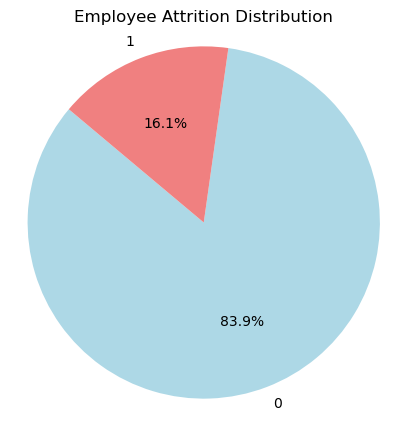

In [94]:
attrition_counts = attr_df['Attrition'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

In [11]:
for col in attr_df.columns :
    if attr_df[col].dtype == object :
        print(f"\n----------------------------------------------\nThe Value count of {col}")
        print(attr_df[col].value_counts())


----------------------------------------------
The Value count of Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64

----------------------------------------------
The Value count of BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

----------------------------------------------
The Value count of Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

----------------------------------------------
The Value count of Education
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64

----------------------------------------------
The Value count of EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      2

In [12]:
attr_df['Age']

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

<Axes: xlabel='Age'>

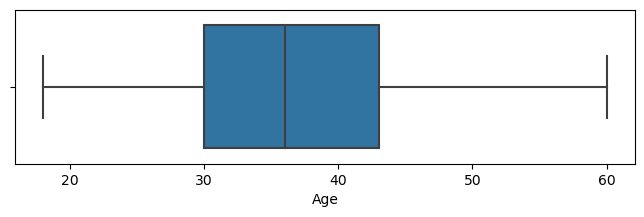

In [13]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = attr_df['Age'])

In [14]:
def dist(data, col) :
    mean_val = data[col].mean()
    median_val = data[col].median()
    mode_val = data[col].mode()[0]

    sns.histplot(data[col], kde=False, color='lightblue')
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(median_val, color='green', linestyle='--', label='Median')
    plt.axvline(mode_val, color='blue', linestyle='--', label='Mode')
    plt.xticks(rotation = 45)
    plt.legend()

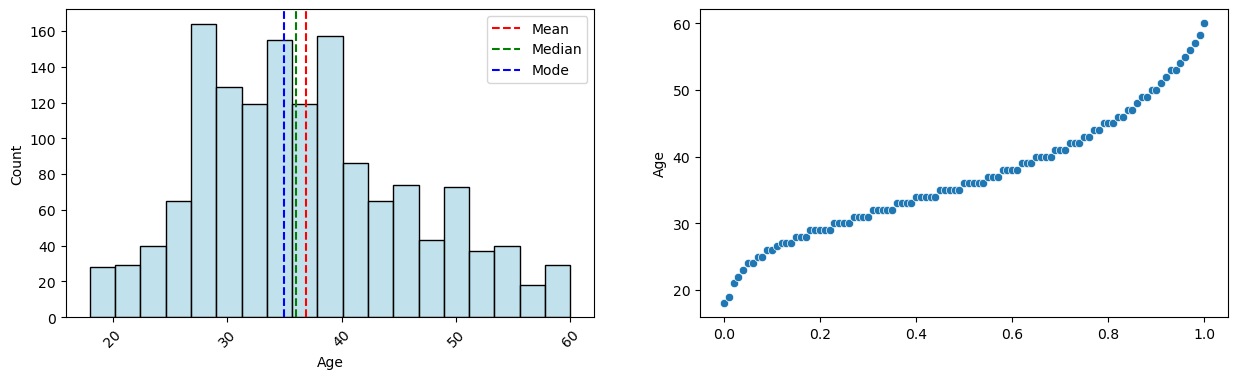

In [15]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(attr_df, 'Age')
plt.subplot(1, 2, 2)
sns.scatterplot(attr_df['Age'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [16]:
def plot_bar(col, tar) :
    plt.figure(figsize = [4, 3])
    sns.barplot(x = tar, y = col, data = attr_df, ci = None, palette = 'pastel')
    plt.title('Average Age by Attrition Status')
    plt.xlabel('Attrition Status')
    plt.ylabel('Average Age')
    plt.xticks(ticks=[0, 1], labels=['Not Attrited', 'Attrited'])
    plt.show()

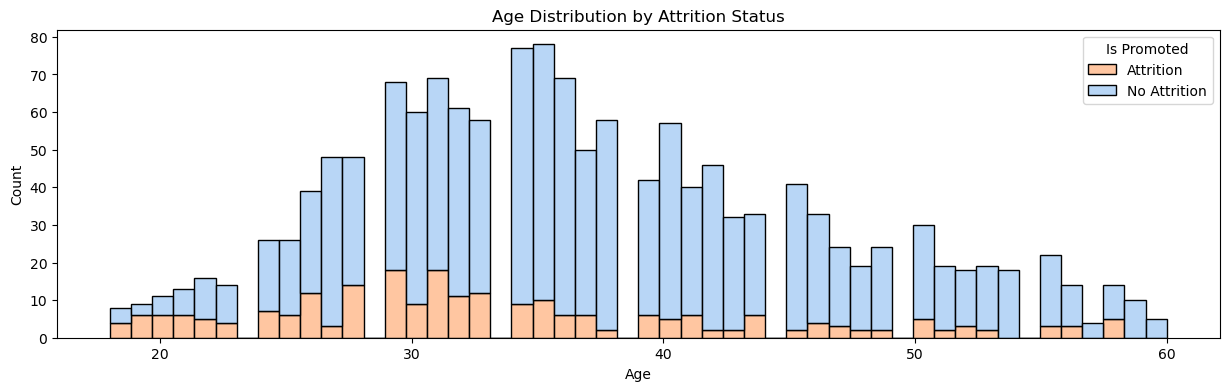

In [89]:
plt.figure(figsize = [15, 4])
sns.histplot(x = attr_df['Age'], hue = attr_df['Attrition'], multiple = 'stack', bins = 50, palette='pastel')
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title = 'Is Promoted', labels = ['Attrition', 'No Attrition'])
plt.show()

    As the given data seems that en.most of employees are in their starting age or Freshers Attires
    most as because may be the type of work they want isn't in that Enviornment.

In [18]:
def outlier_remover(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    col[col < lower_limit] = lower_limit
    col[col > upper_limit] = upper_limit
    return cols

In [19]:
attr_df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [34]:
attr_df['Attrition'].replace('Yes', 1, inplace = True)
attr_df['Attrition'].replace('No', 0, inplace = True)

In [35]:
attr_df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

    Attrition refers to the gradual loss of employees through resignations, retirements, or terminations. 
    It reflects workforce stability, employee satisfaction, and retention strategies, 
    impacting organizational culture and performance.

In [22]:
attr_df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

`A Function for Categorical values to get Data`

In [60]:
def plot_categorical_distributions(col) :
    activity_counts = attr_df[col].value_counts()

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 3, 1)    # Bar Plot Helps to create some bar to represent the data value
    sns.barplot(
        x = activity_counts.index, 
        y = activity_counts.values, 
        palette = 'viridis'
    )
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation = 45)
    
    activity_counts = attr_df.groupby([col, 'Attrition']).size().unstack(fill_value=0)
    plt.subplot(1, 3, 2)
    plt.pie(activity_counts[0], labels = activity_counts.index, autopct = '%1.1f%%', colors = sns.color_palette('viridis', len(activity_counts.index)), startangle = 90)
    plt.title('Not Attrited (0) by Business Travel')
    plt.axis('equal')
    plt.subplot(1, 3, 3)
    plt.pie(activity_counts[1], labels = activity_counts.index, autopct = '%1.1f%%', colors = sns.color_palette('viridis', len(activity_counts.index)), startangle = 90)
    plt.title('Attrited (1) by Business Travel')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

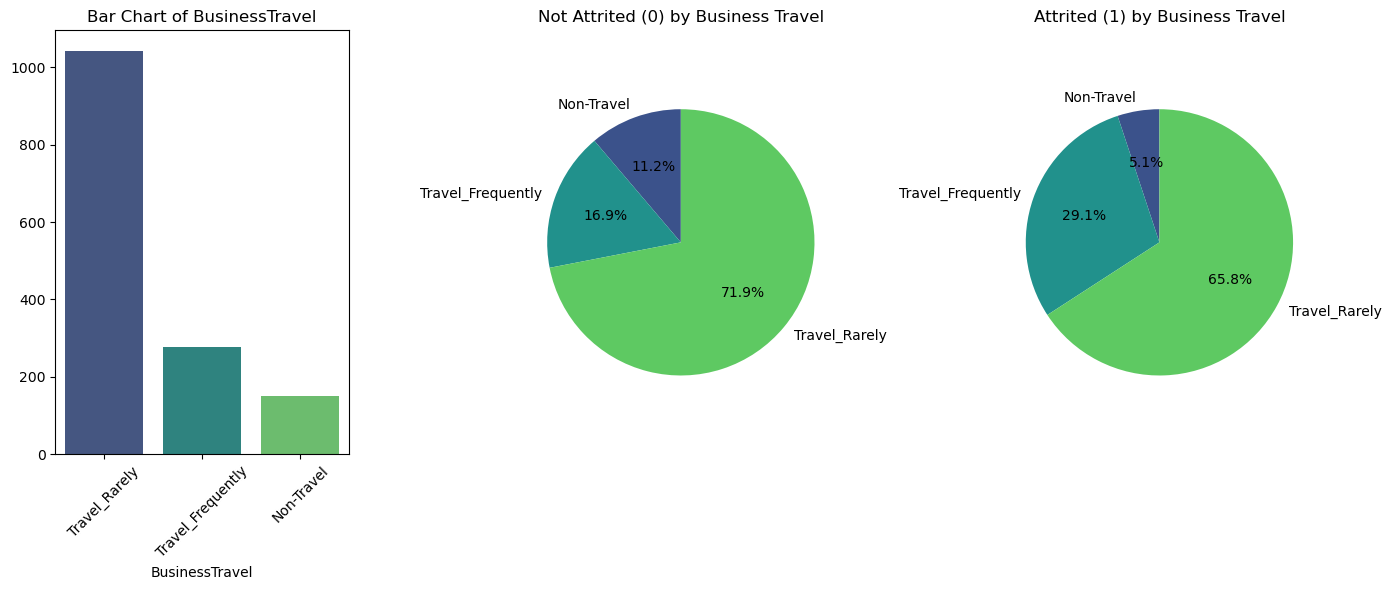

In [61]:
plot_categorical_distributions('BusinessTravel')

In [63]:
attr_df['DailyRate'].describe()

count   1470.00
mean     802.49
std      403.51
min      102.00
25%      465.00
50%      802.00
75%     1157.00
max     1499.00
Name: DailyRate, dtype: float64

<Axes: xlabel='DailyRate'>

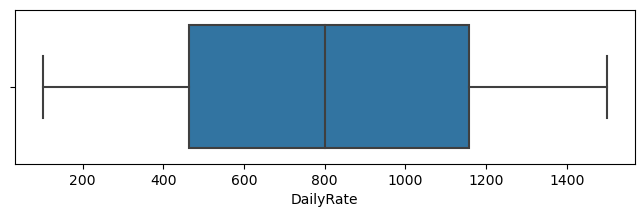

In [64]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = attr_df['DailyRate'])

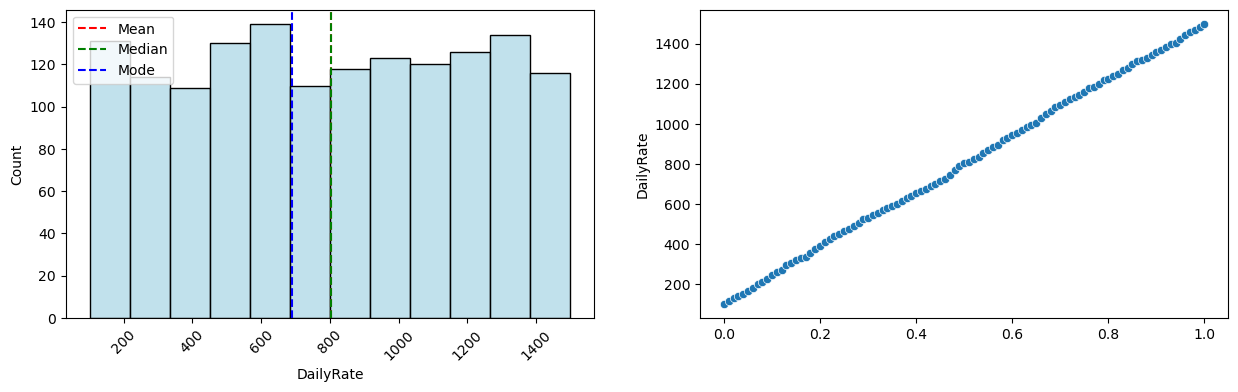

In [65]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(attr_df, 'DailyRate')
plt.subplot(1, 2, 2)
sns.scatterplot(attr_df['DailyRate'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

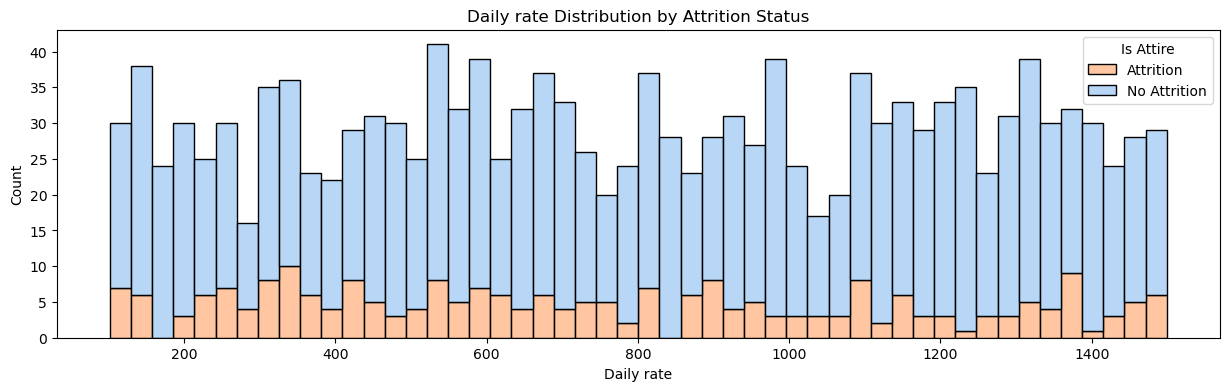

In [88]:
plt.figure(figsize = [15, 4])
sns.histplot(x = attr_df['DailyRate'], hue = attr_df['Attrition'], multiple = 'stack', bins = 50, palette='pastel')
plt.title('Daily rate Distribution by Attrition Status')
plt.xlabel('Daily rate')
plt.ylabel('Count')
plt.legend(title = 'Is Attire', labels = ['Attrition', 'No Attrition'])
plt.show()

    As we know that DailyRate typically refers to the amount of money an employee earns per day of work
    So it seems that there is no so much typical change of user of earnings in the Attrition of word.

In [70]:
attr_df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

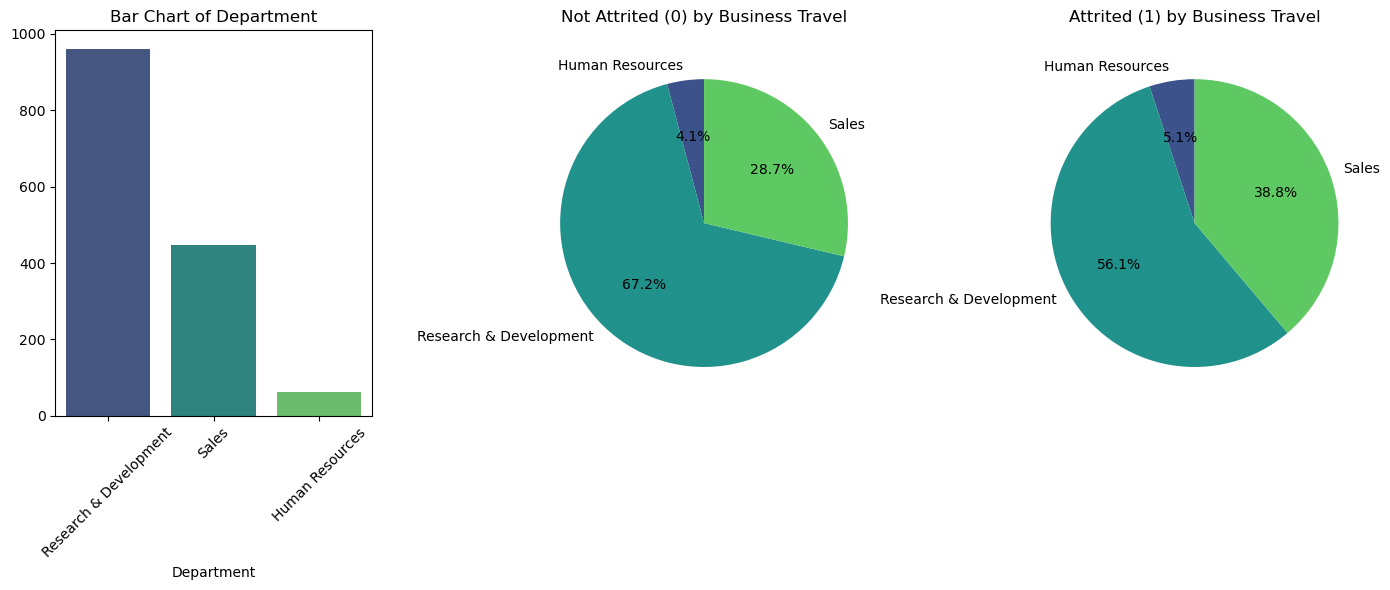

In [71]:
plot_categorical_distributions('Department')

In [73]:
attr_df['DistanceFromHome'].describe()

count   1470.00
mean       9.19
std        8.11
min        1.00
25%        2.00
50%        7.00
75%       14.00
max       29.00
Name: DistanceFromHome, dtype: float64

<Axes: xlabel='DistanceFromHome'>

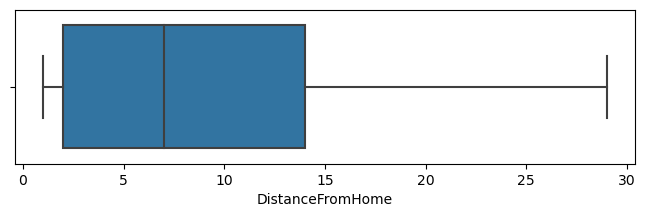

In [74]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = attr_df['DistanceFromHome'])

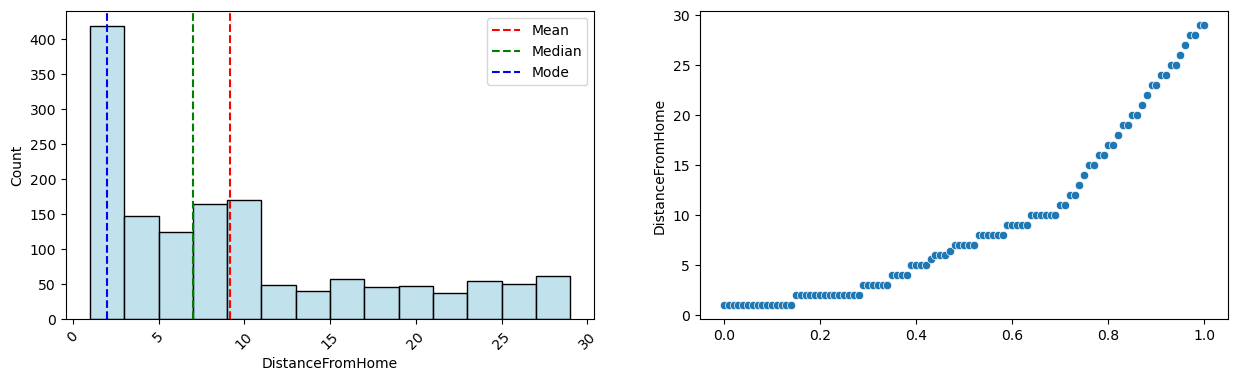

In [75]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(attr_df, 'DistanceFromHome')
plt.subplot(1, 2, 2)
sns.scatterplot(attr_df['DistanceFromHome'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

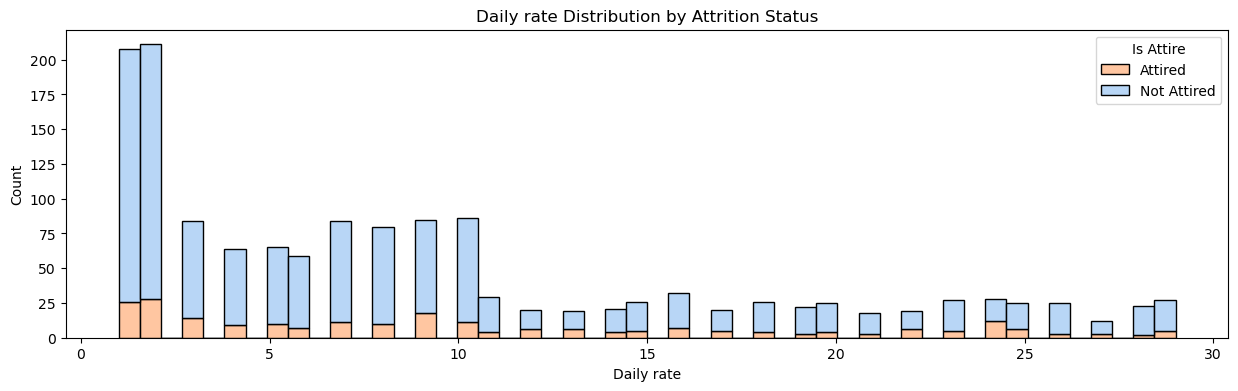

In [77]:
plt.figure(figsize = [15, 4])
sns.histplot(x = attr_df['DistanceFromHome'], hue = attr_df['Attrition'], multiple = 'stack', bins = 50, palette='pastel')
plt.title('Daily rate Distribution by Attrition Status')
plt.xlabel('Daily rate')
plt.ylabel('Count')
plt.legend(title = 'Is Attire', labels = ['Attired', 'Not Attired'])
plt.show()

    In some Point distance matters bcz
        Research often shows a correlation between distance from home and attrition; 
        longer commutes can lead to higher turnover rates

In [91]:
attr_df['Education'].value_counts()

Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64

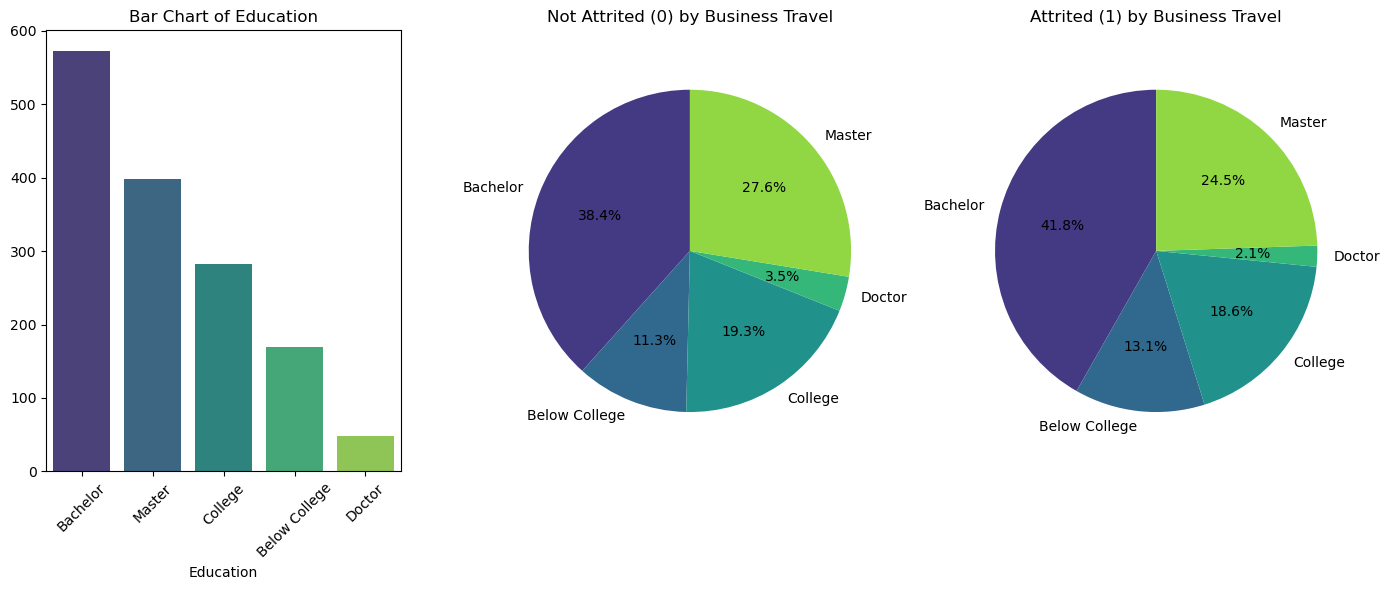

In [92]:
plot_categorical_distributions('Education')

In [100]:
num_df = attr_df.select_dtypes(include = 'number')

In [101]:
cat_df = attr_df.select_dtypes(include = 'object')

In [104]:
cat_df.head()

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,Y,No,Outstanding,Very High,Better
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Y,Yes,Excellent,Medium,Better
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Y,Yes,Excellent,High,Better
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better


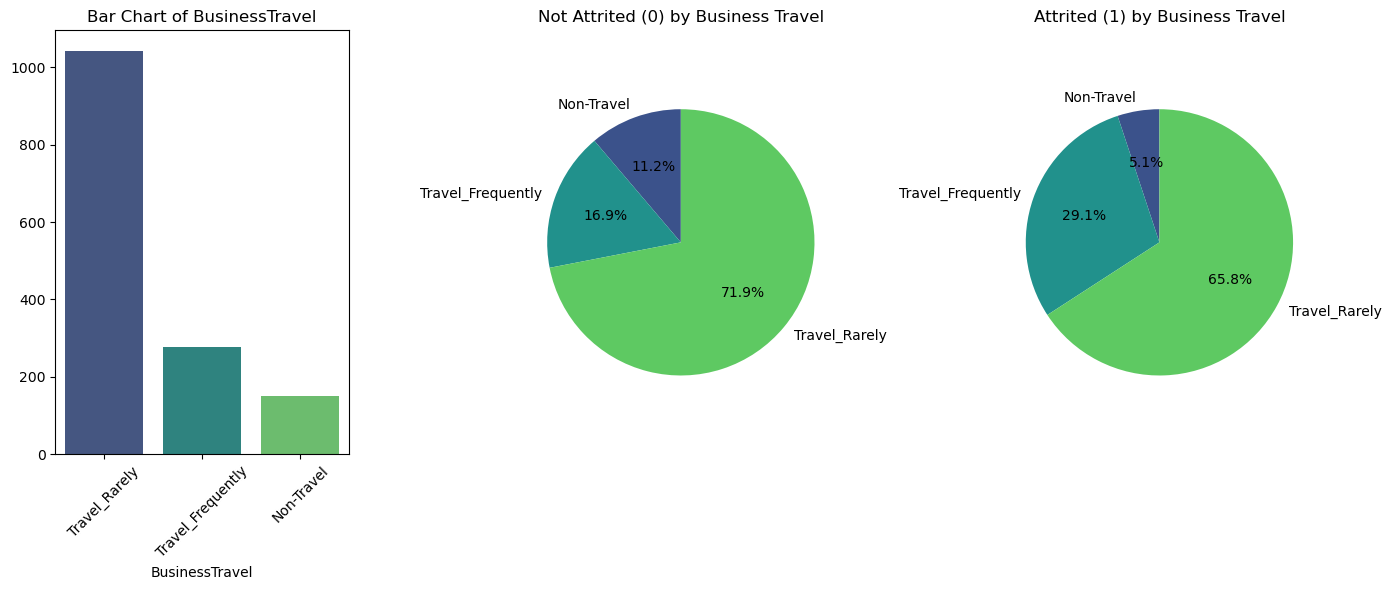

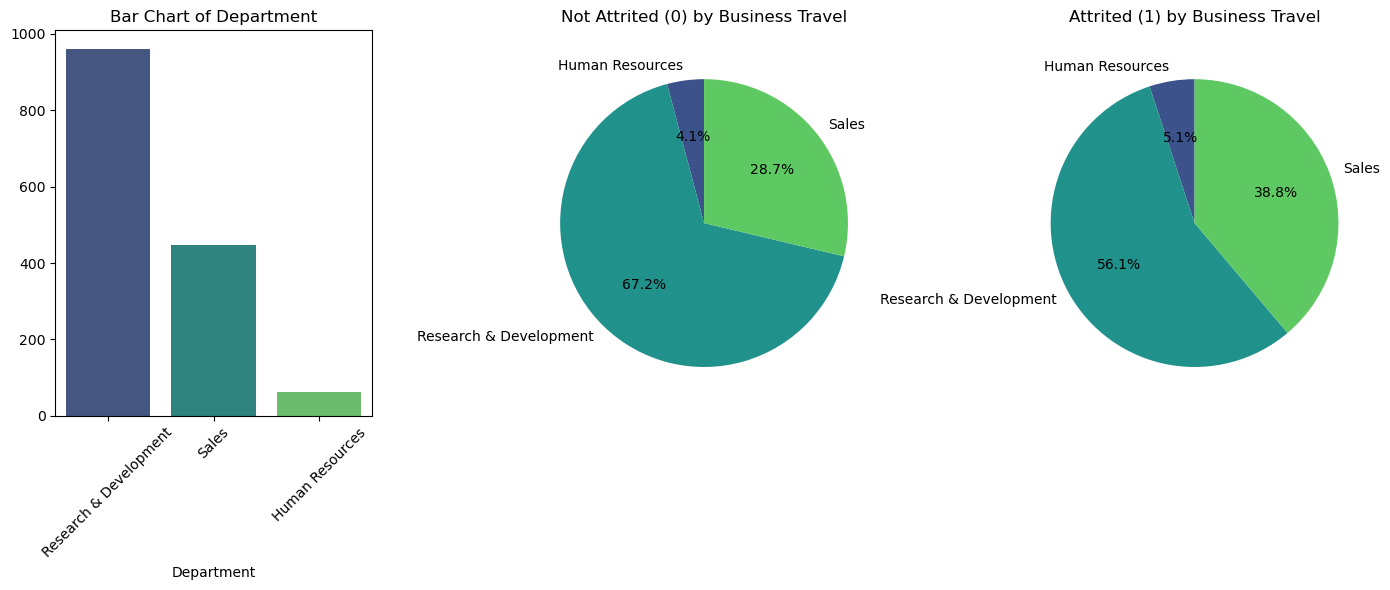

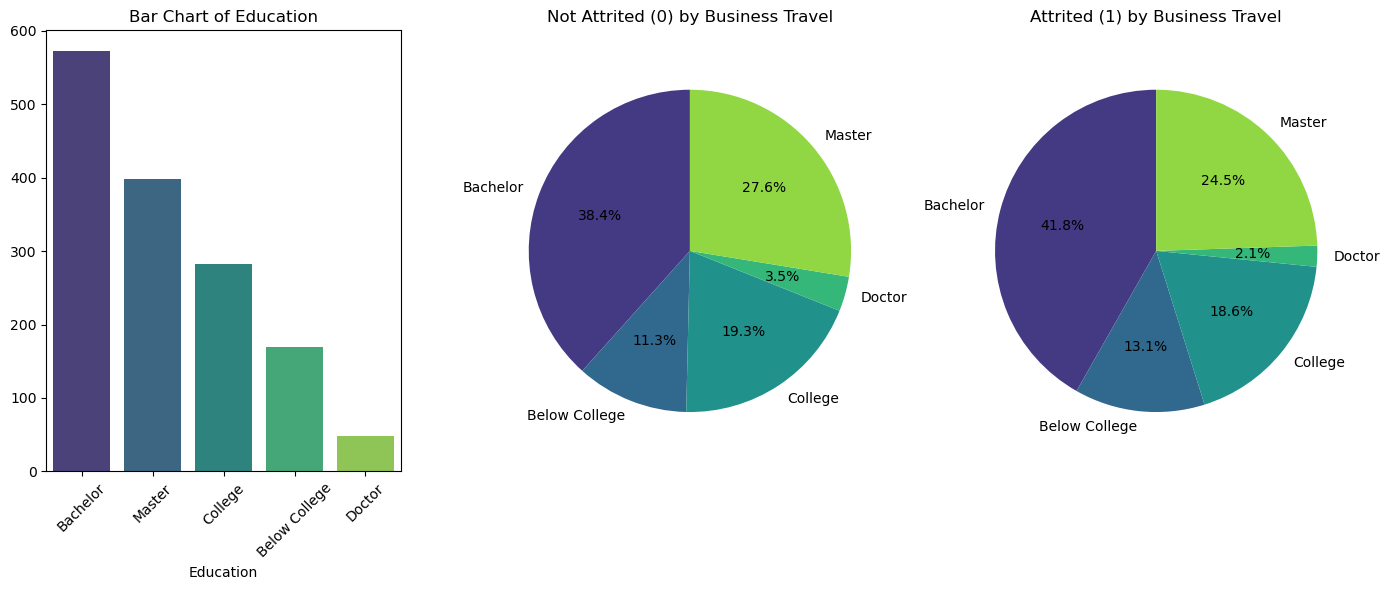

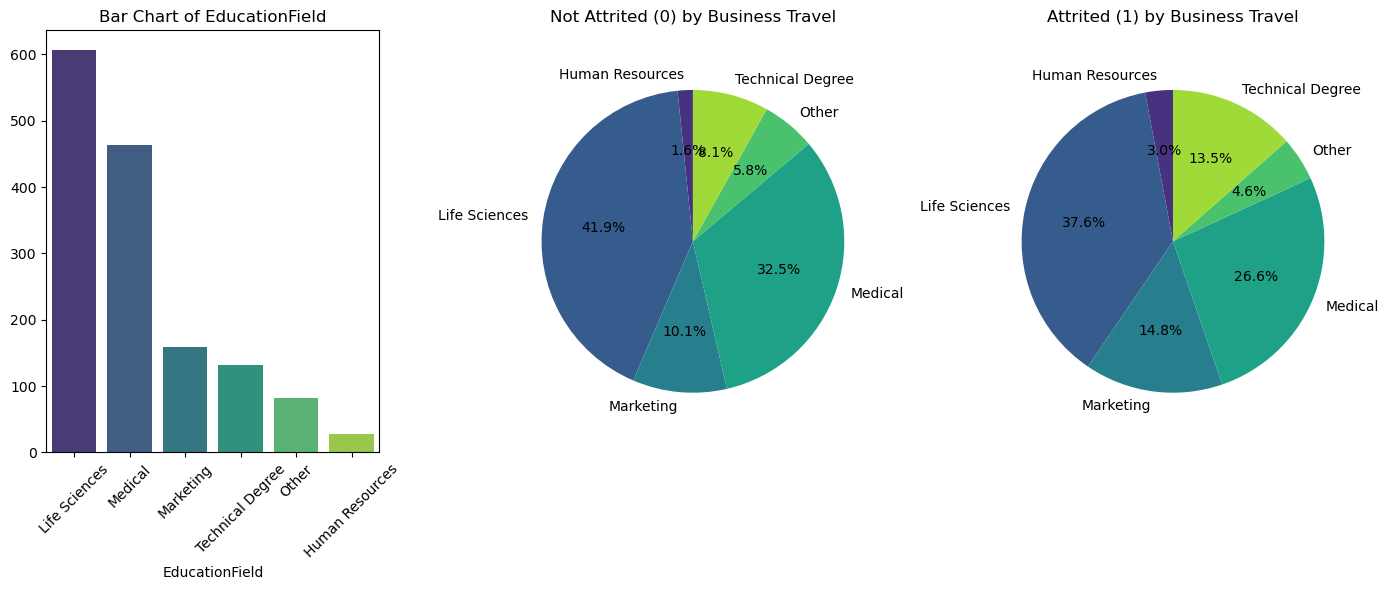

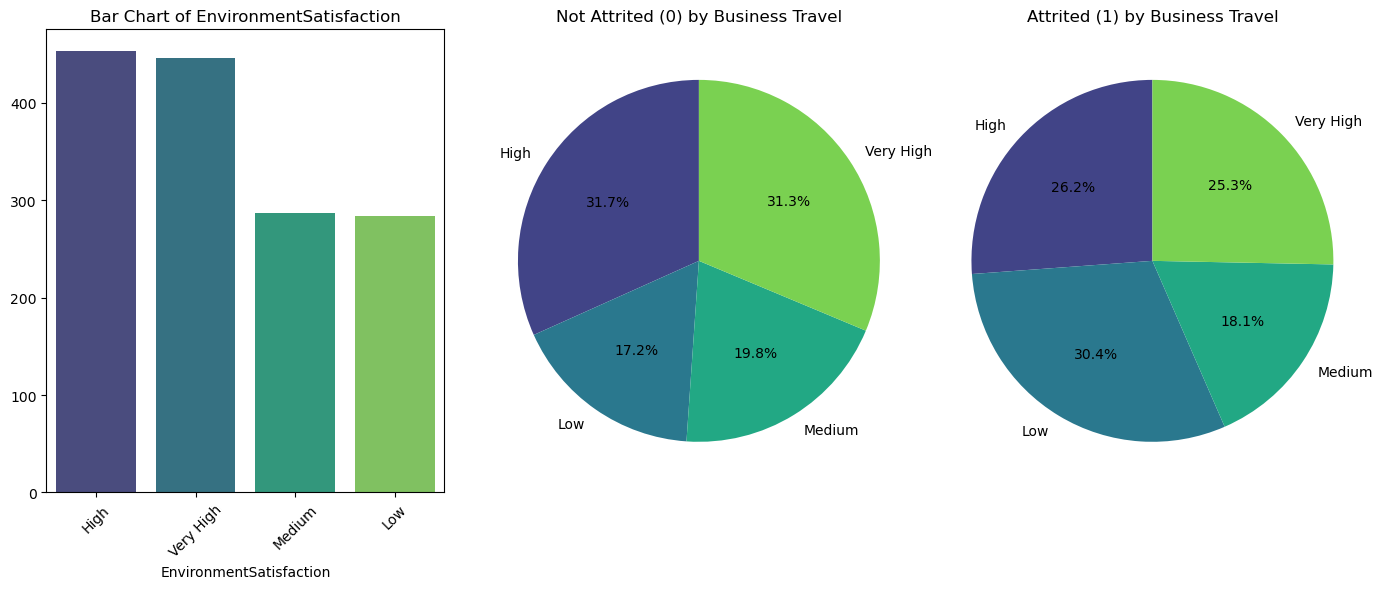

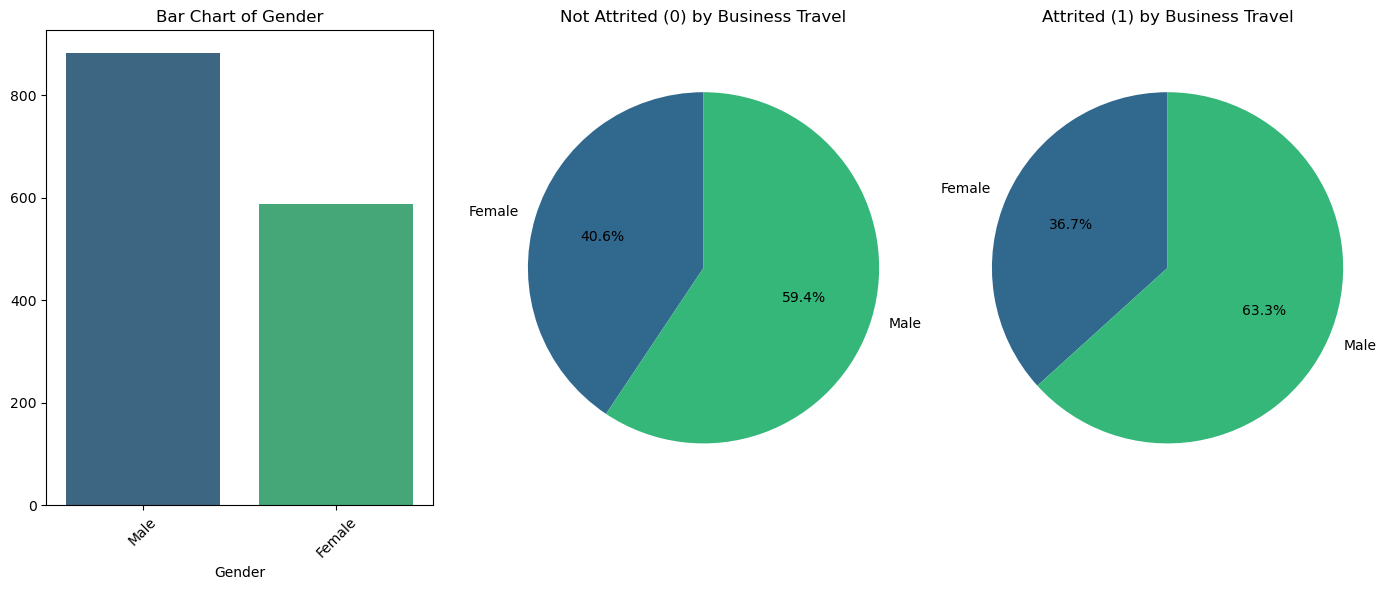

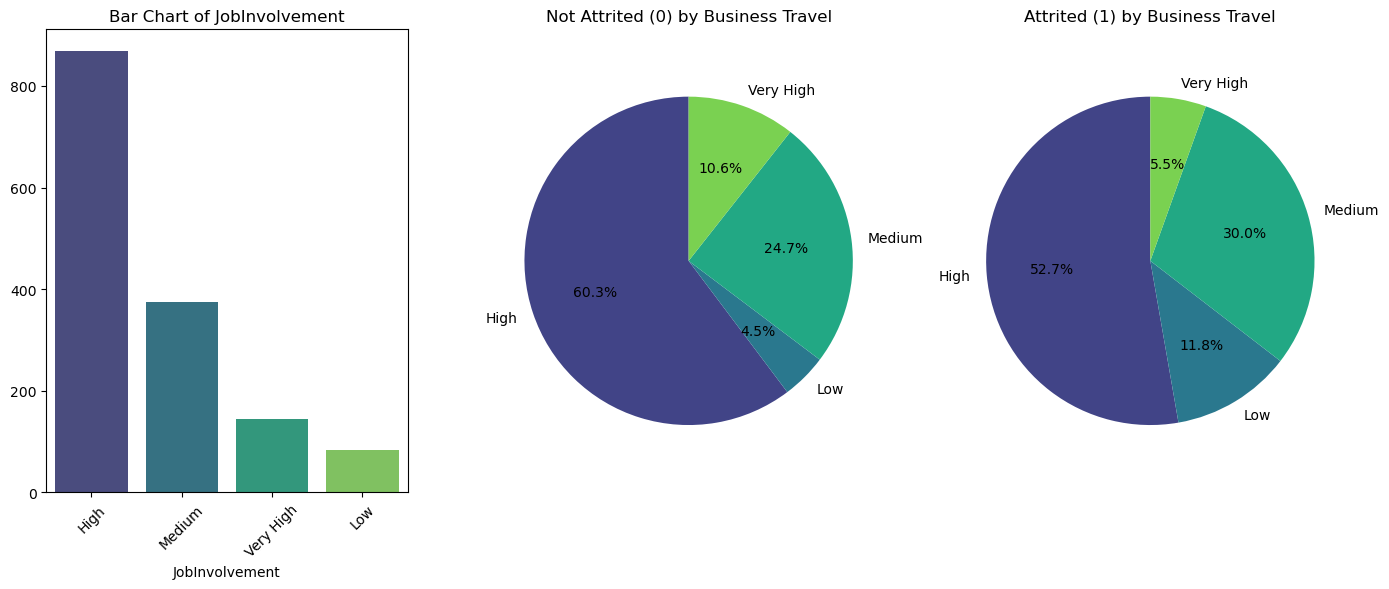

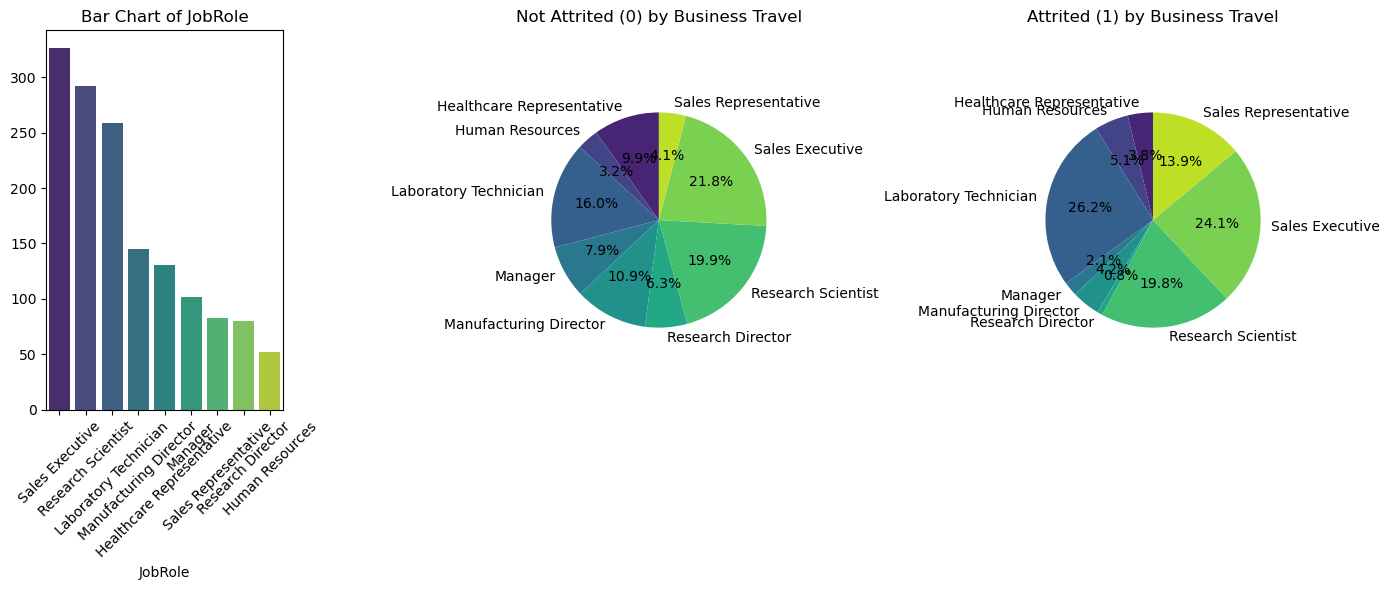

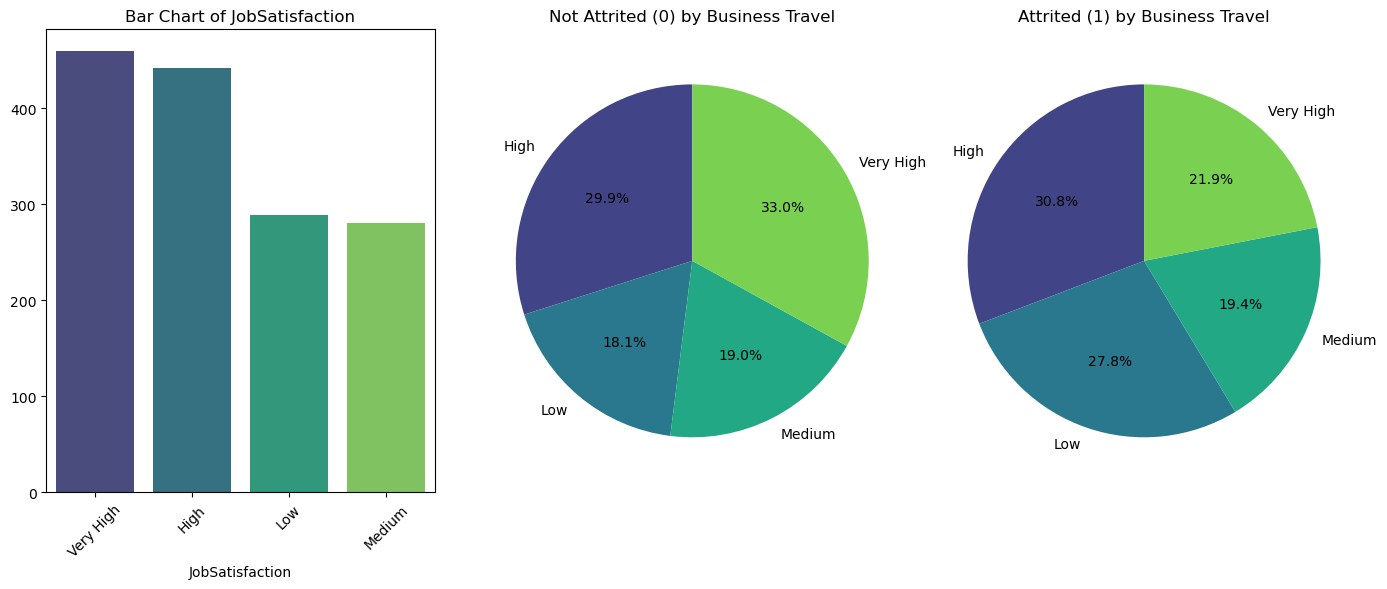

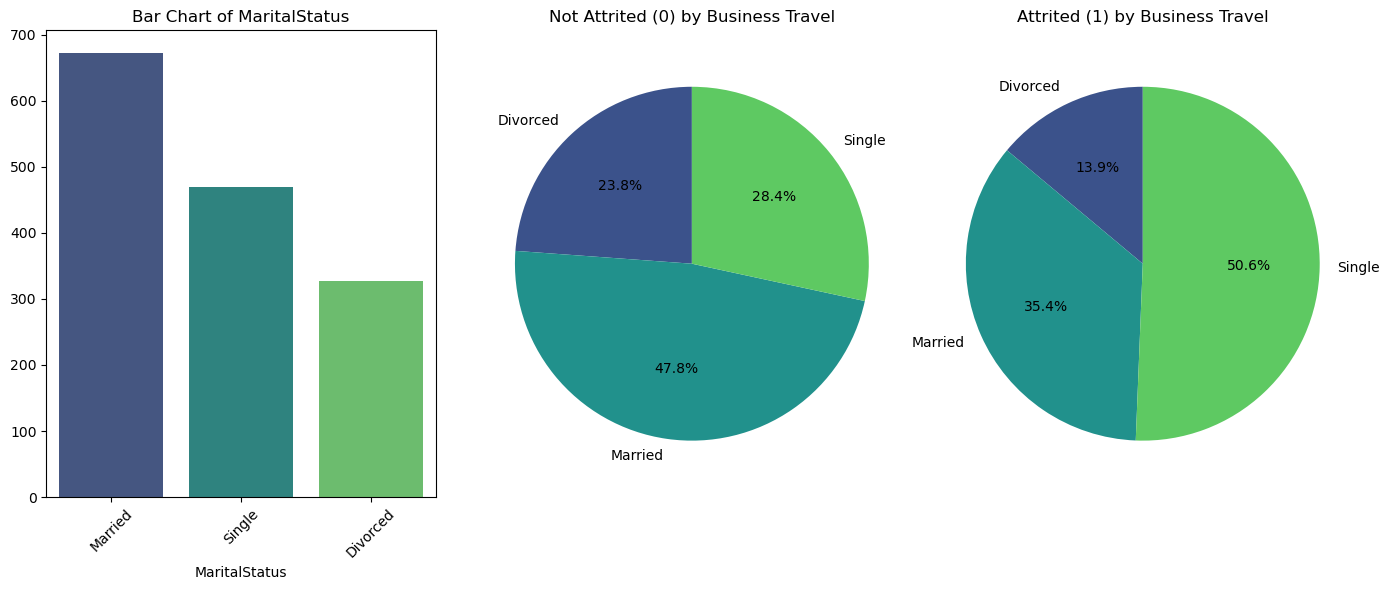

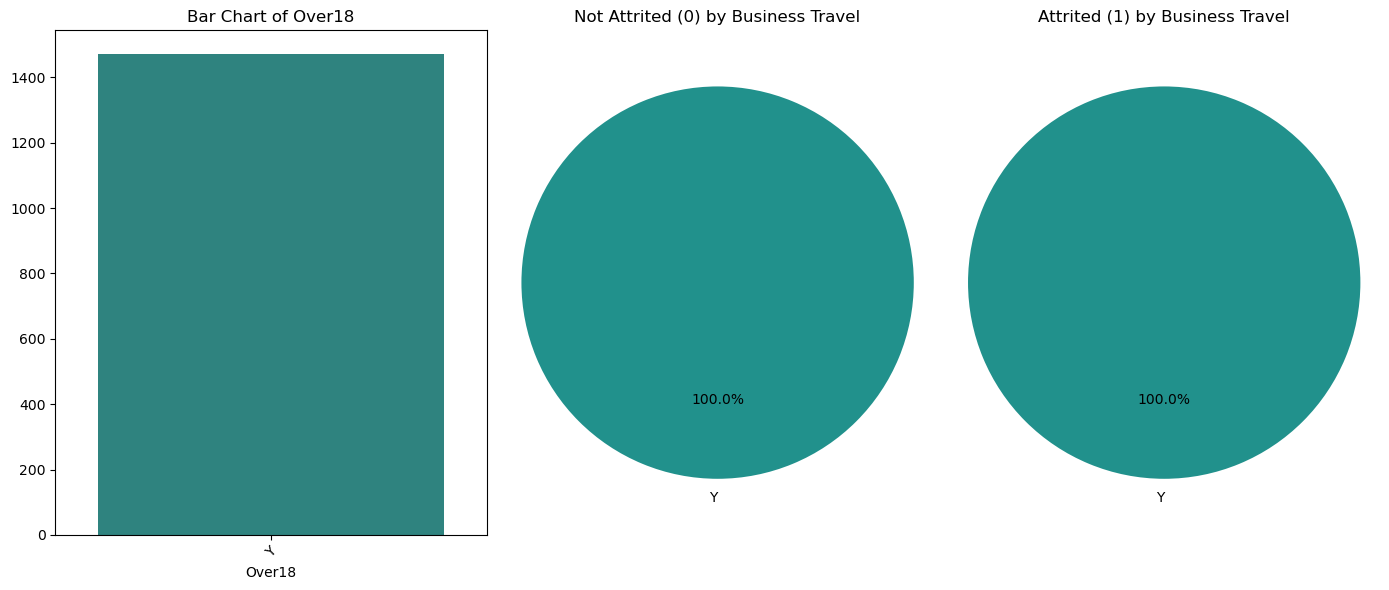

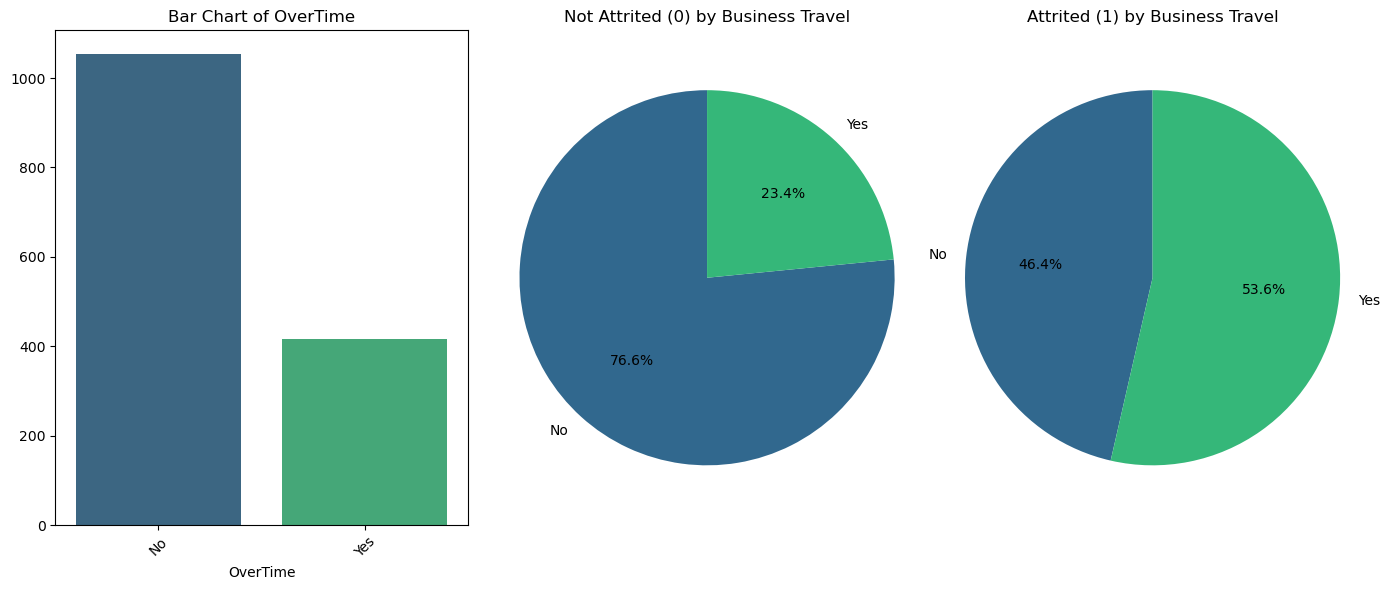

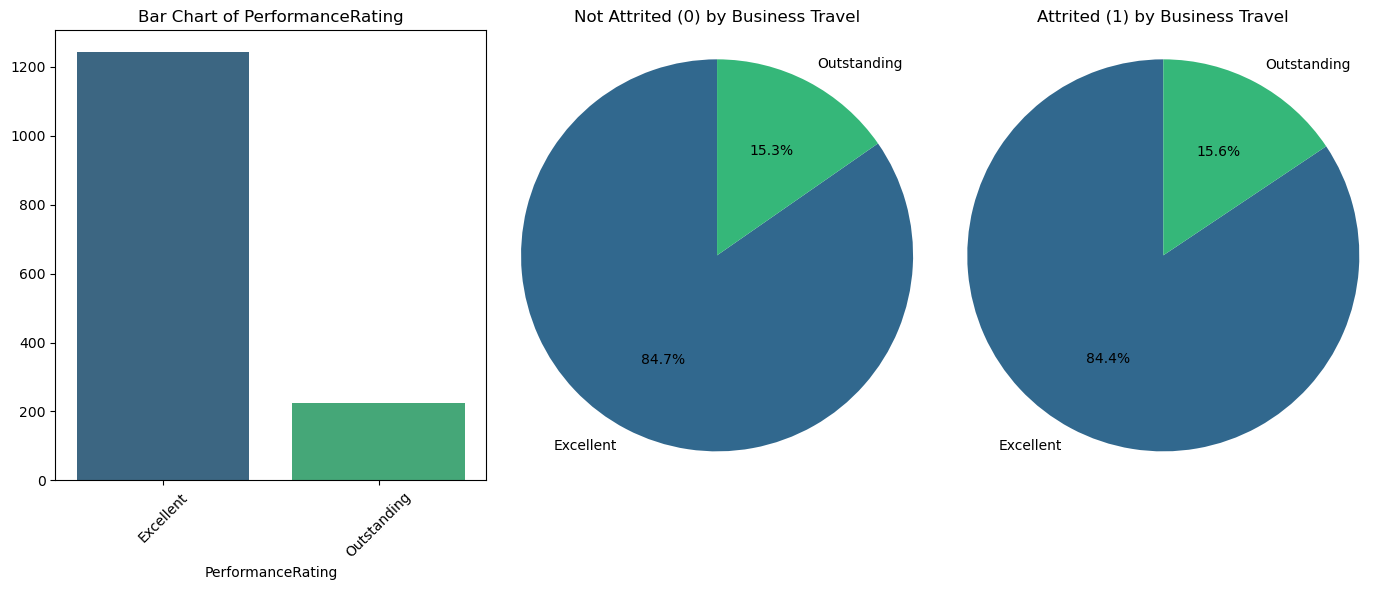

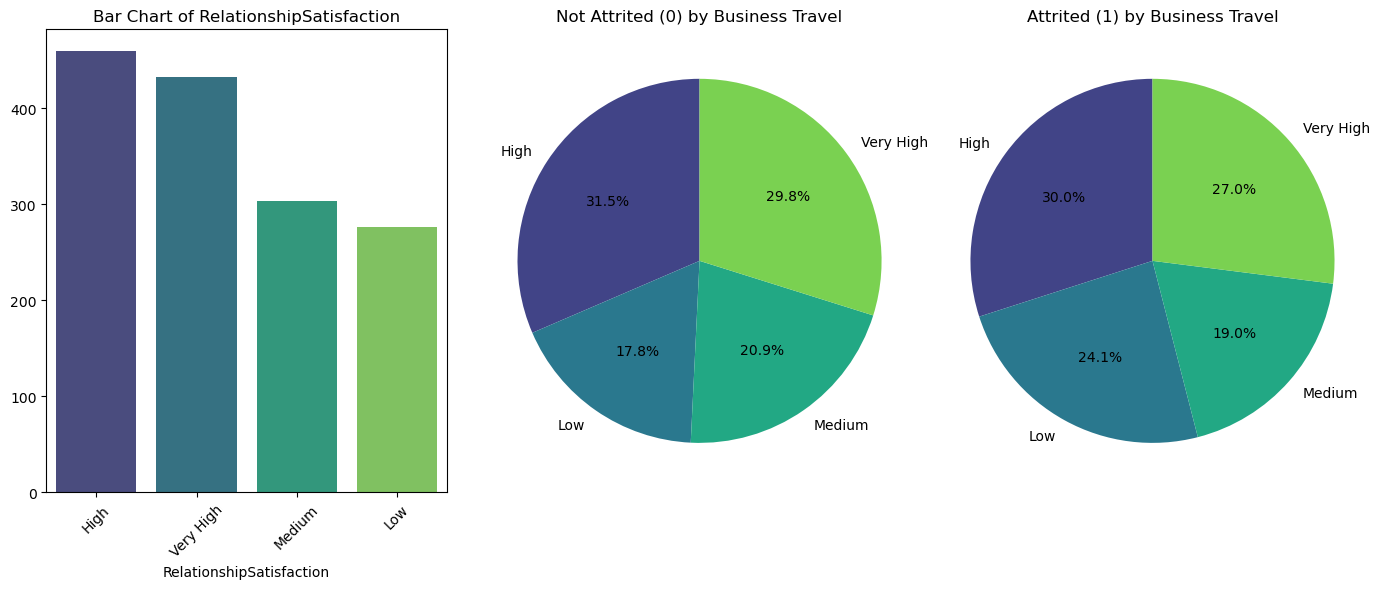

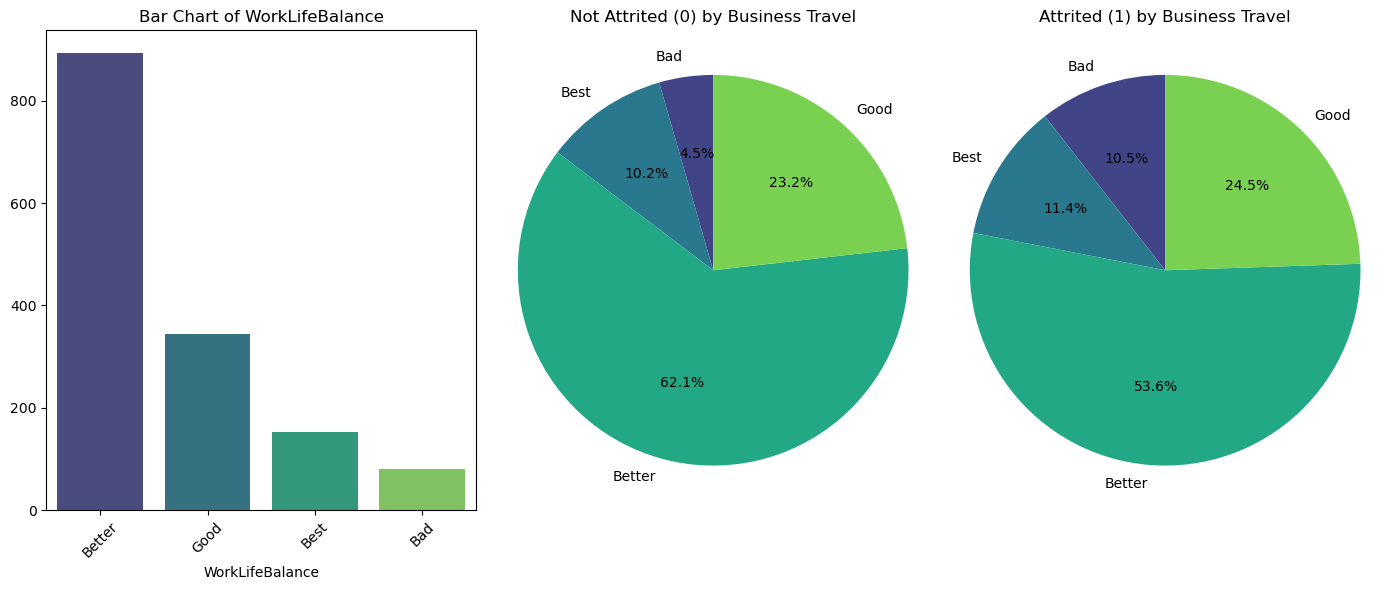

In [107]:
for col in cat_df.columns :
    plot_categorical_distributions(col)

| **Insight Area**              | **Key Findings**                                                                                   |
|-------------------------------|----------------------------------------------------------------------------------------------------|
| **Business Travel**           | Many employees travel rarely; 29.1% of attrited employees travel frequently, indicating dissatisfaction. |
| **Department Impact**         | Research & Development has the highest attrition rate (56.1%), suggesting internal issues.       |
| **Education**                 | 41.8% of attrited employees hold Bachelor's degrees, indicating specific challenges for this group. |
| **Job Satisfaction**          | "Very High" job satisfaction dropped from 33.0% to 21.9% among attrited employees, highlighting morale issues. |
| **Marital Status**            | Higher attrition among single employees (50.6%) compared to married ones (35.4%), suggesting different pressures. |
| **Performance Ratings**       | Similar ratings for attrited and non-attrited employees indicate other factors affect attrition.   |
| **Relationship Satisfaction**  | Drop in "Very High" relationship satisfaction (from 29.8% to 27.0%) underscores the importance of workplace relationships. |
| **Work-Life Balance**         | Higher reports of "Bad" work-life balance (11.4%) among attrited employees signal a critical area for improvement. |


Business Travel Patterns:

Most employees (over 1000) travel rarely for business.
Attrition Analysis:

Not Attrited: 71.9% of employees who stay travel rarely.
Attrited: 65.8% of those who leave also travel rarely, but 29.1% travel frequently, indicating potential dissatisfaction.

Department Distribution:

Research & Development has the highest employee count, significantly outnumbering Sales and Human Resources.
Attrition Analysis:

Not Attrited (0):
67.2% from Research & Development.
28.7% from Sales.
4.1% from Human Resources.
Attrited (1):
56.1% from Research & Development.
38.8% from Sales.
5.1% from Human Resources.

Education Distribution:

Bachelor's degree holders are the most numerous, followed by Master's and College graduates.
Attrition Analysis:

Not Attrited (0):
Bachelor's: 38.4%
Master's: 27.6%
College: 19.3%
Attrited (1):
Bachelor's: 41.8%
Master's: 24.5%
College: 18.6%

Education Distribution:

Life Sciences has the highest number of employees, followed by Medical and Marketing.
Attrition Analysis:

Not Attrited (0):
Life Sciences: 41.9%
Medical: 32.5%
Marketing: 10.1%
Attrited (1):
Life Sciences: 37.6%
Medical: 26.6%
Marketing: 14.8%


Job Satisfaction Distribution:

The majority of employees report Very High job satisfaction, followed by High satisfaction levels.
Attrition Analysis:

Not Attrited (0):
Very High: 33.0%
High: 29.9%
Medium: 19.0%
Low: 18.1%
Attrited (1):
Very High: 21.9%
High: 30.8%
Medium: 27.8%
Low: 19.4%

Marital Status Distribution:

The majority of employees are Married, followed by Single and Divorced.
Attrition Analysis:

Not Attrited (0):
Married: 47.8%
Single: 28.4%
Divorced: 23.8%
Attrited (1):
Married: 35.4%
Single: 50.6%
Divorced: 13.9%


Age Distribution:

All employees are over 18, as indicated by the bar chart.
Attrition Analysis:

Not Attrited (0): 100% of employees are categorized as not attrited.
Attrited (1): 100% of employees are also categorized as attrited.

Performance Rating Distribution:

The majority of employees have an Excellent performance rating, with a significantly smaller number rated as Outstanding.
Attrition Analysis:

Not Attrited (0):
Excellent: 84.7%
Outstanding: 15.3%
Attrited (1):
Excellent: 84.4%
Outstanding: 15.6%

The bar chart indicates that the majority of employees report High relationship satisfaction, followed by Very High, Medium, and Low satisfaction levels.
Attrition Analysis:

Not Attrited (0):
Very High: 29.8%
High: 31.5%
Medium: 20.9%
Low: 17.8%
Attrited (1):
Very High: 27.0%
High: 30.0%
Medium: 19.0%
Low: 24.1%

The majority of employees report a Better work-life balance, with significantly fewer reporting Good, Best, or Bad.
Attrition Analysis:

Not Attrited (0):
Better: 62.1%
Good: 23.2%
Best: 10.2%
Bad: 4.5%
Attrited (1):
Better: 53.6%
Good: 24.5%
Best: 10.5%
Bad: 11.4%


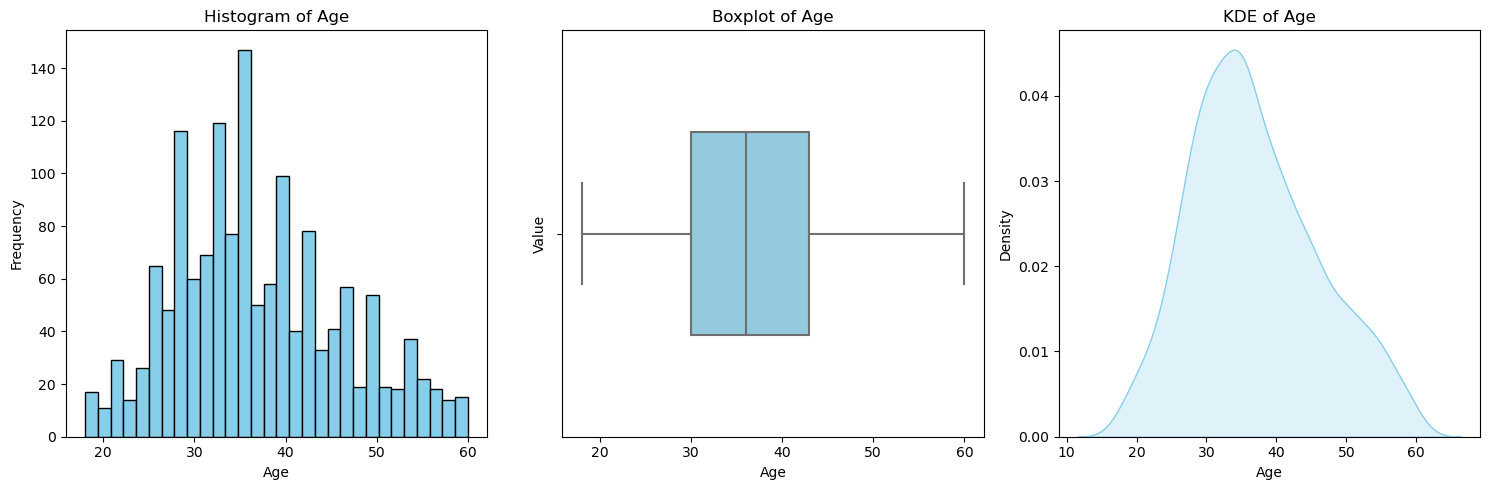

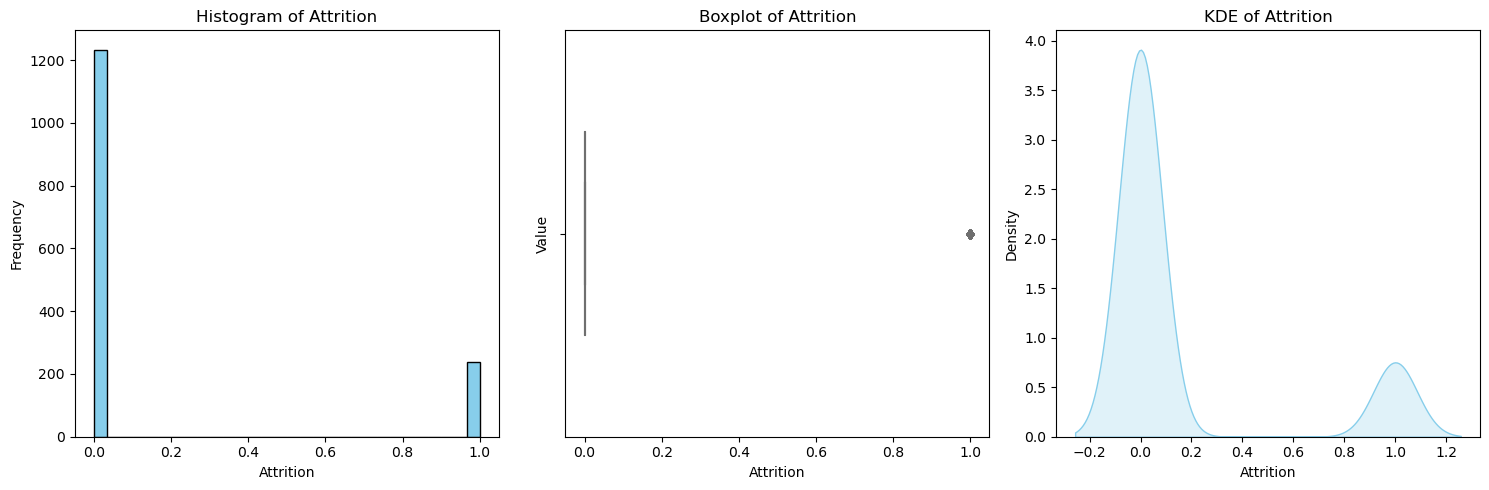

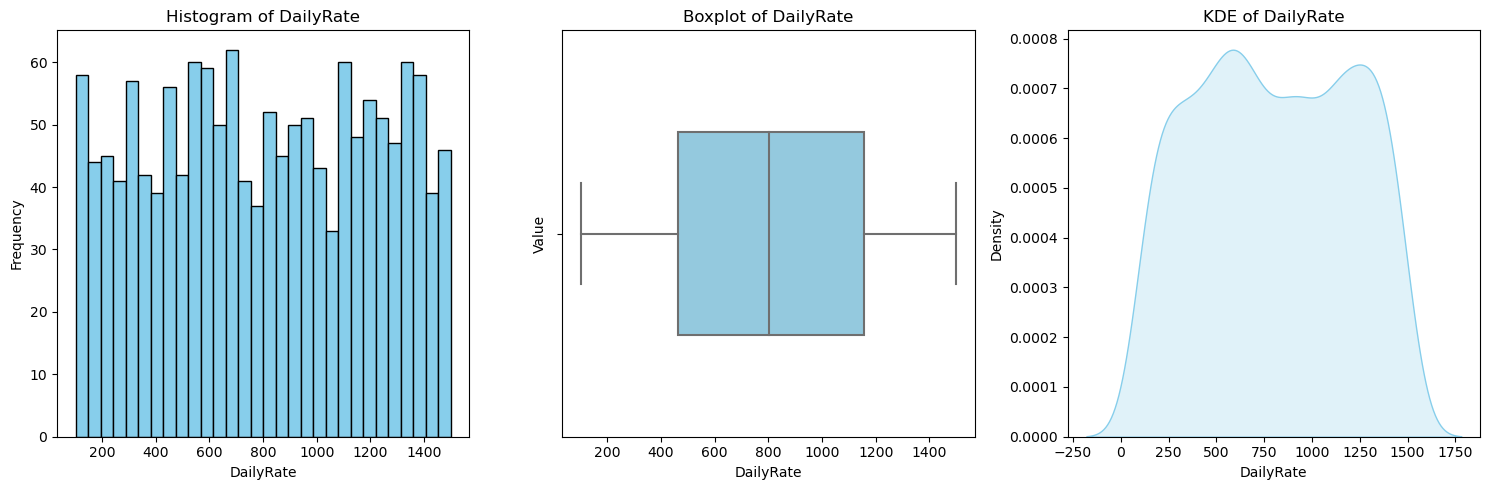

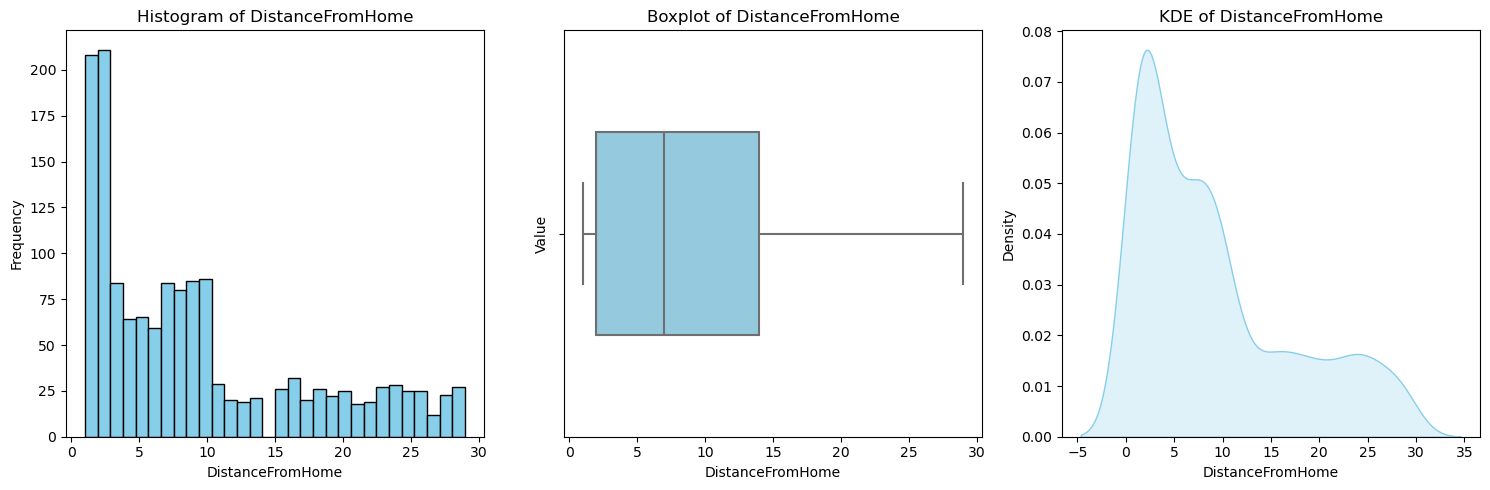

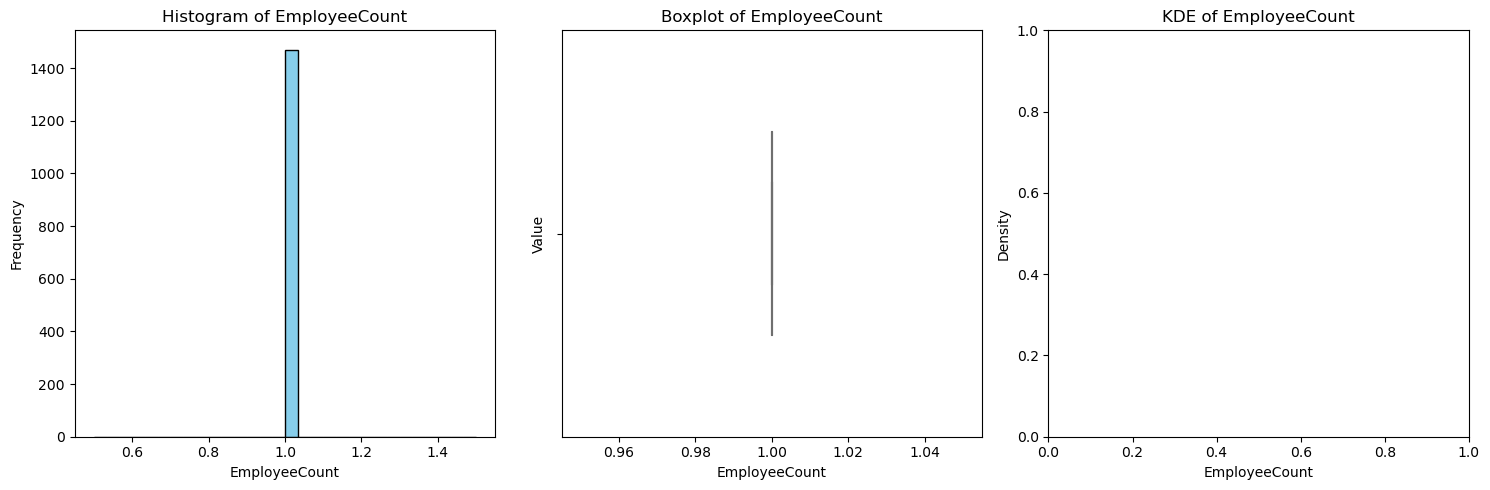

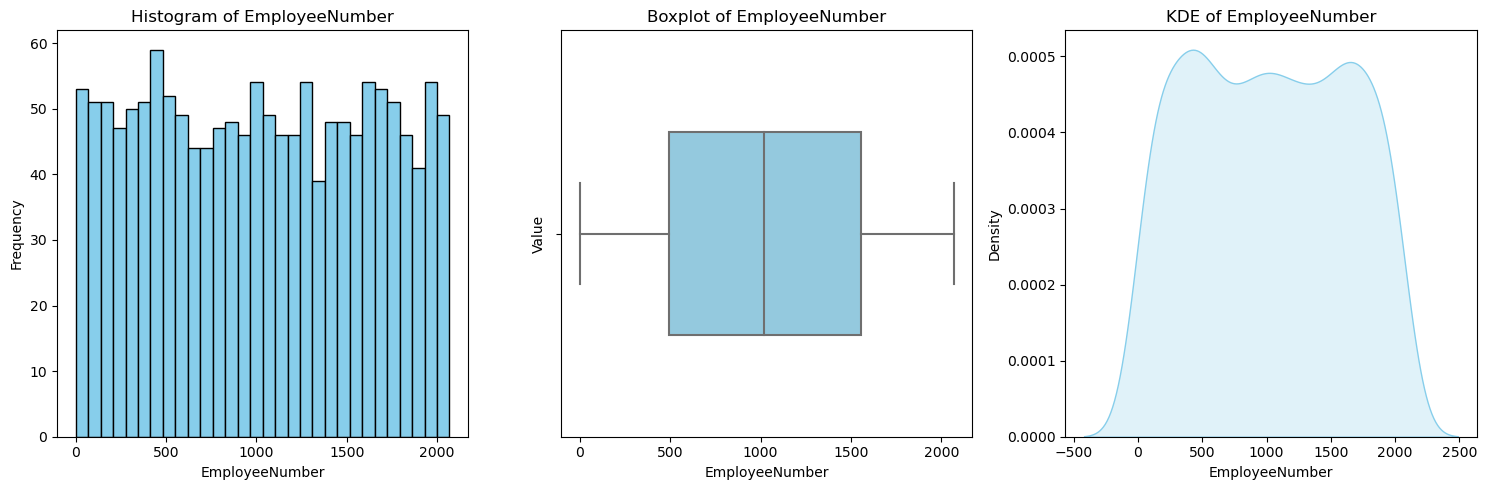

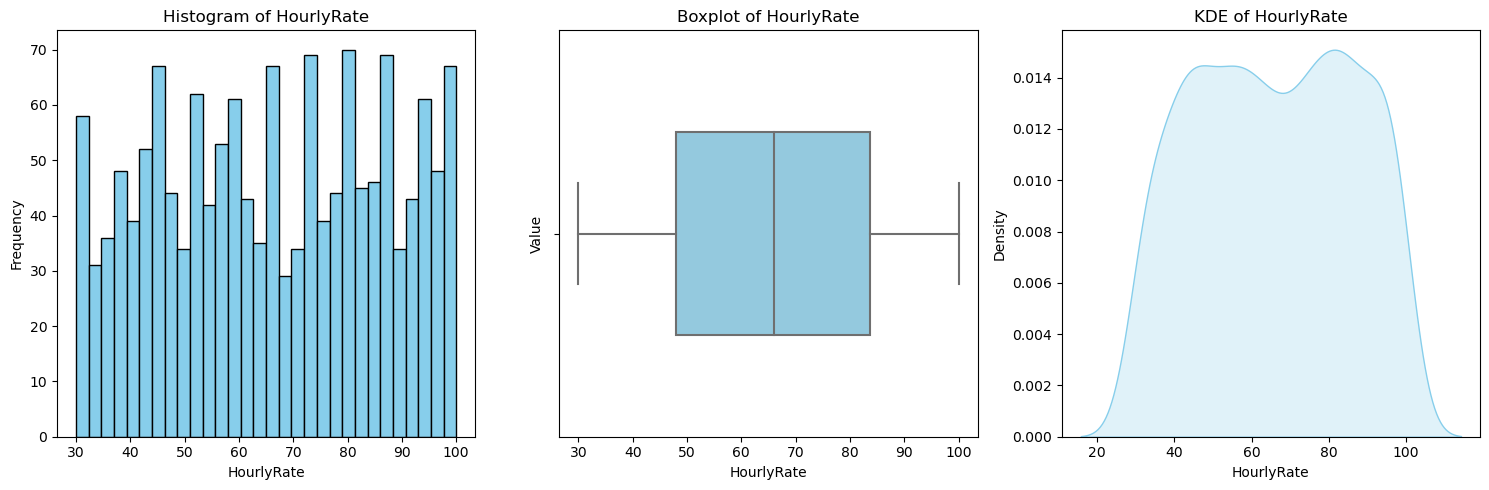

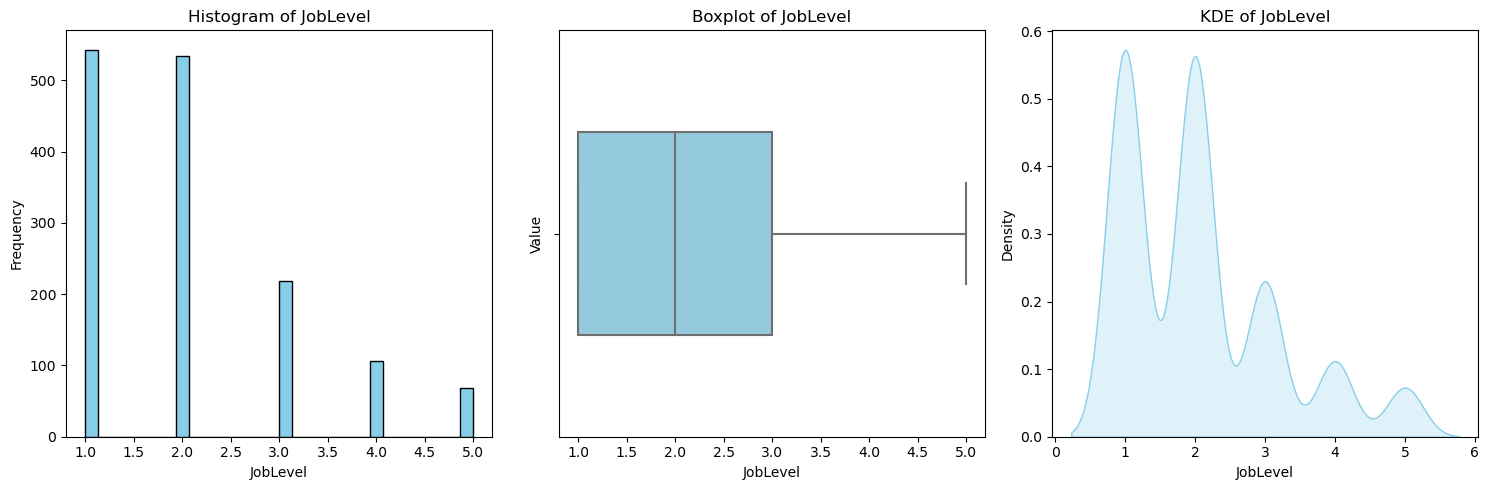

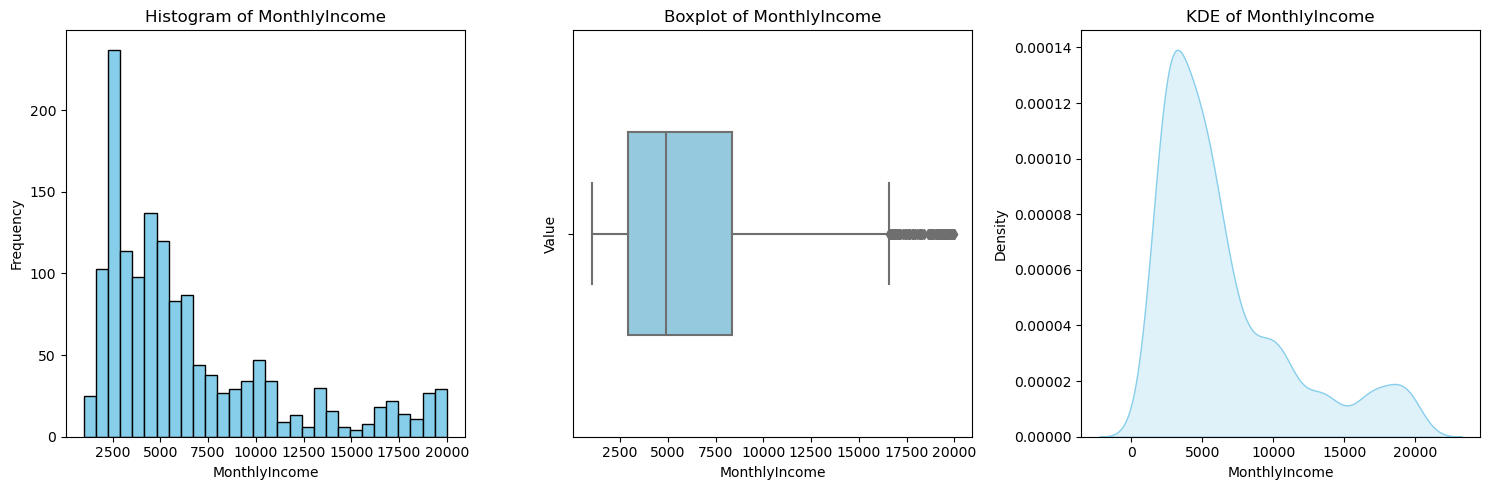

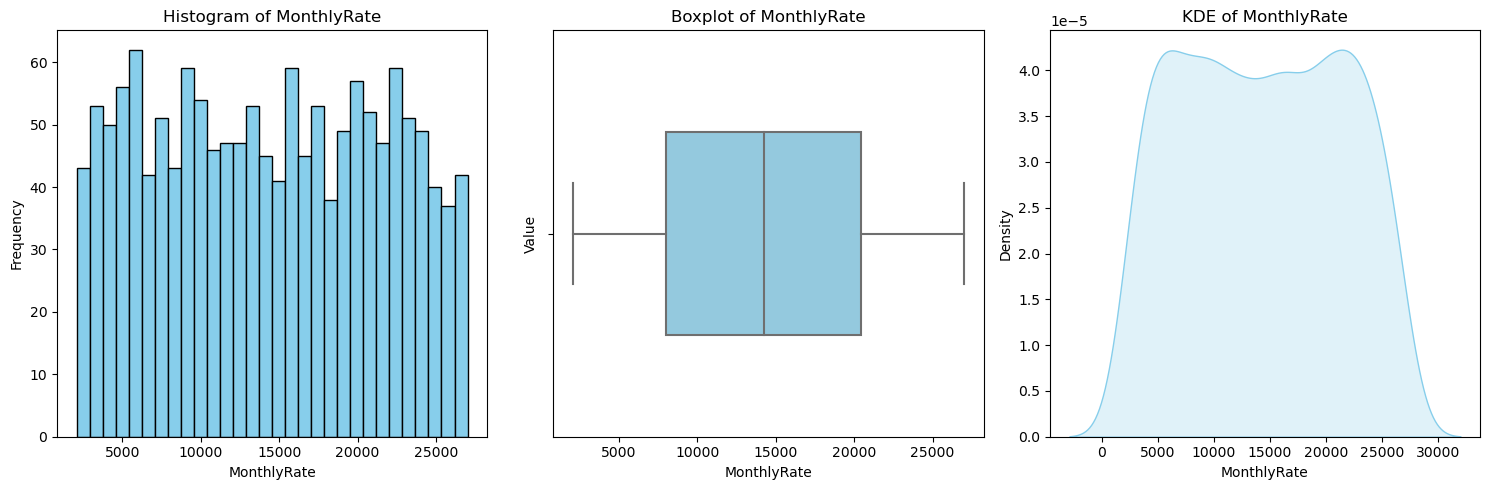

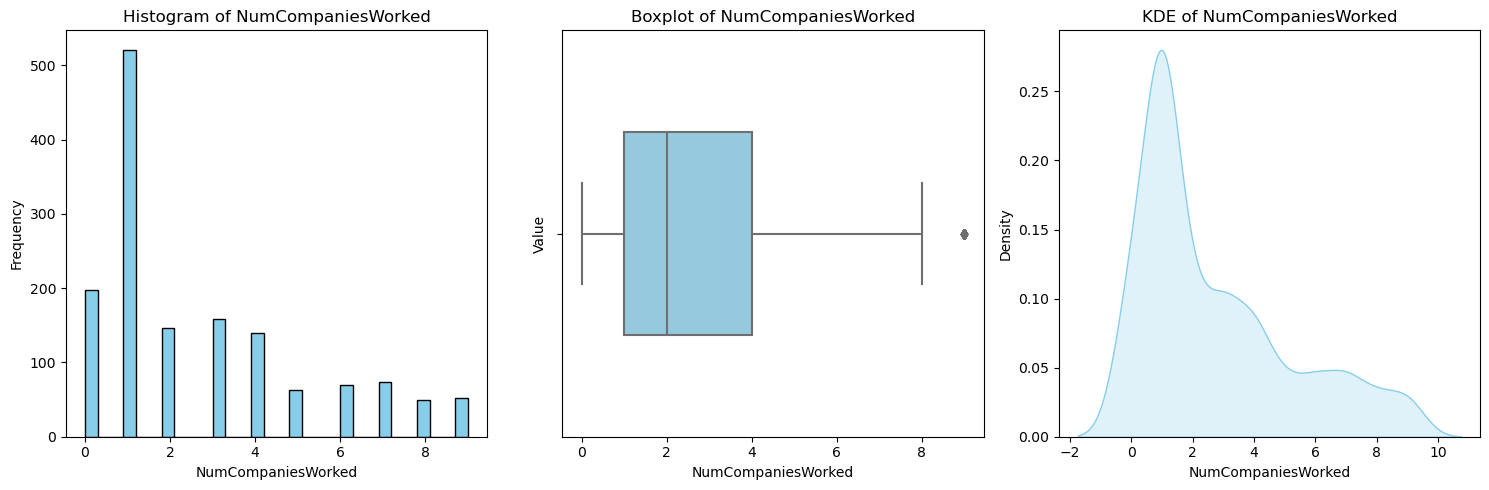

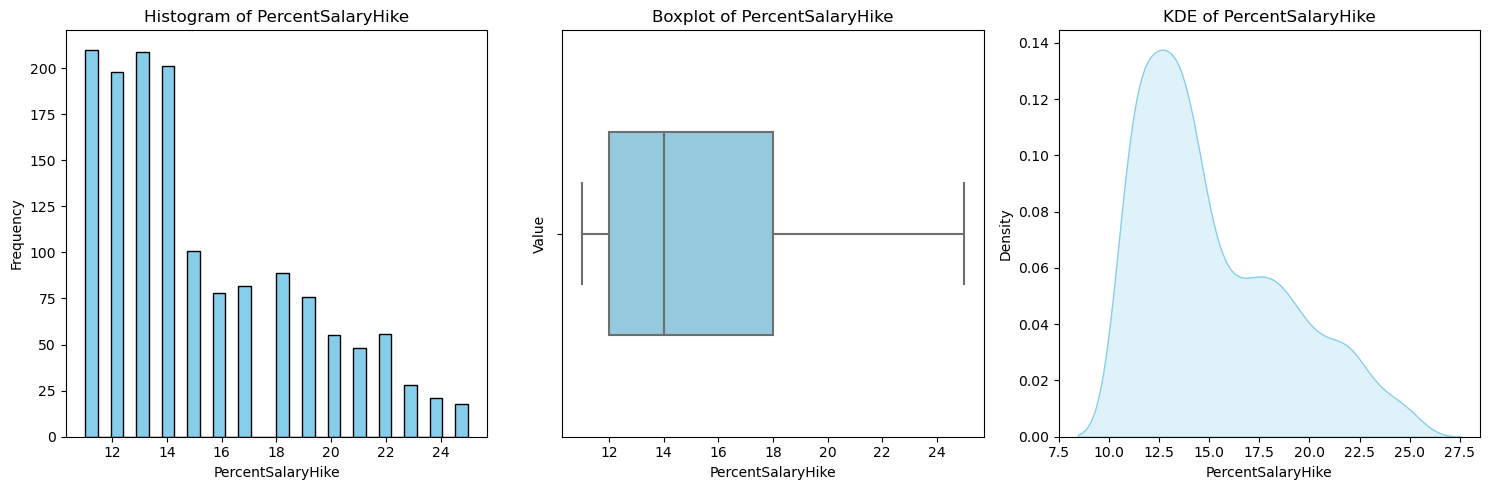

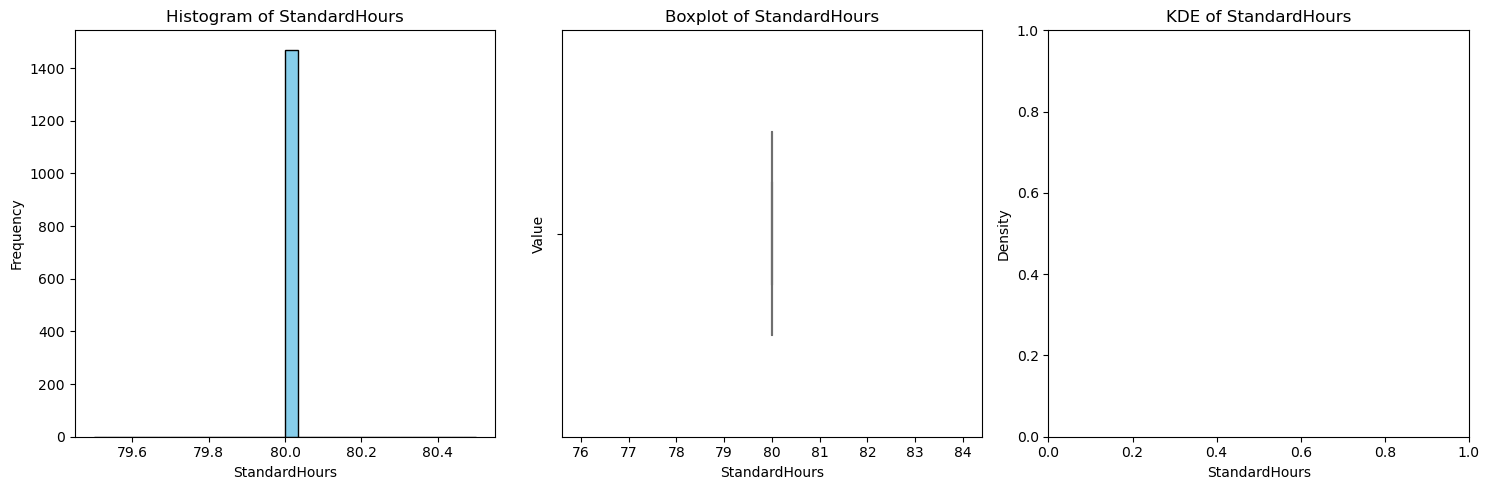

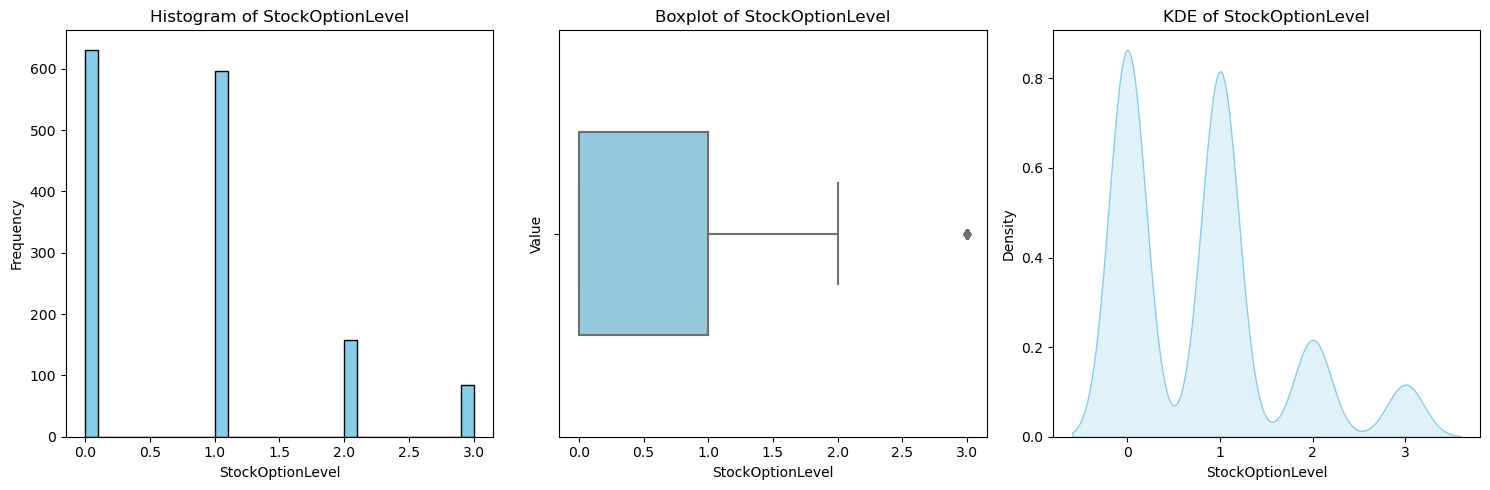

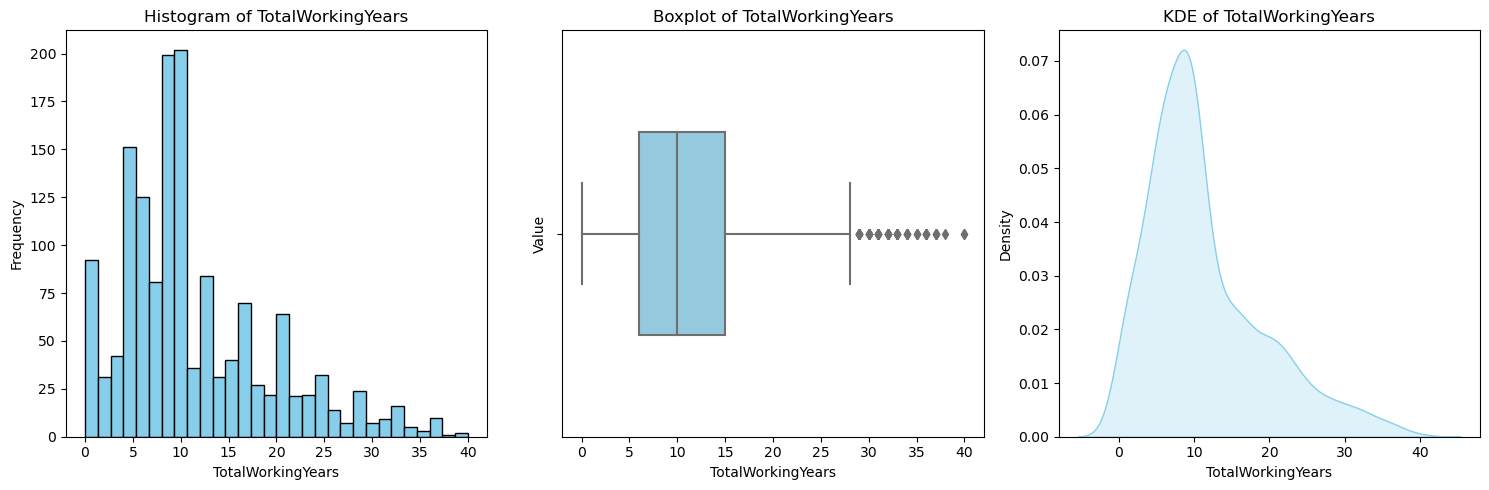

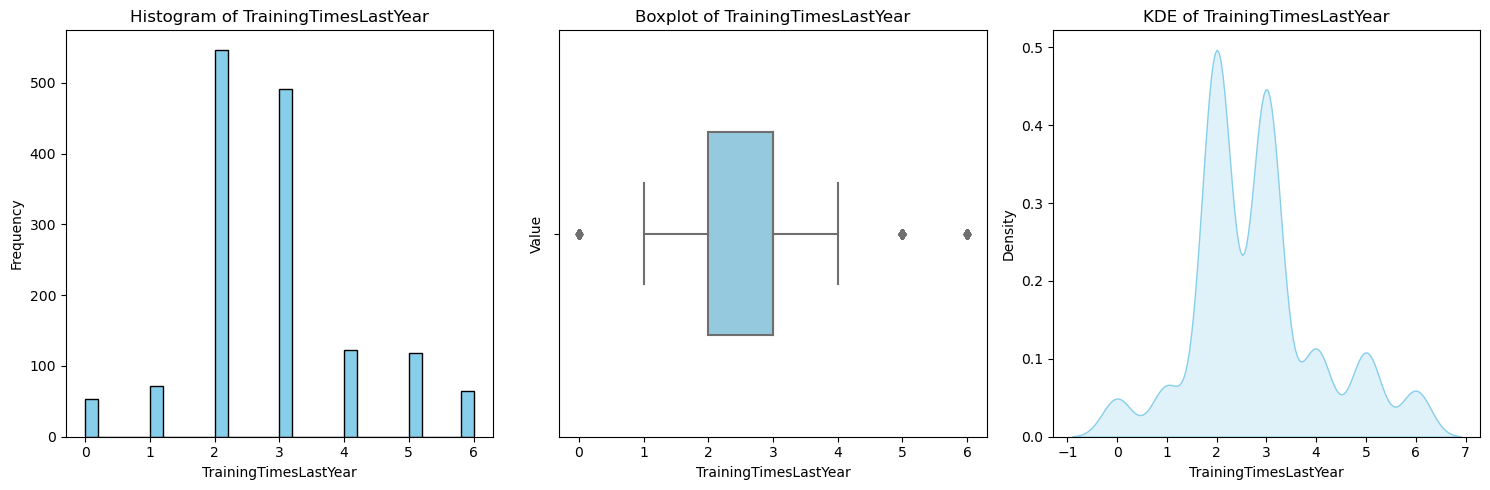

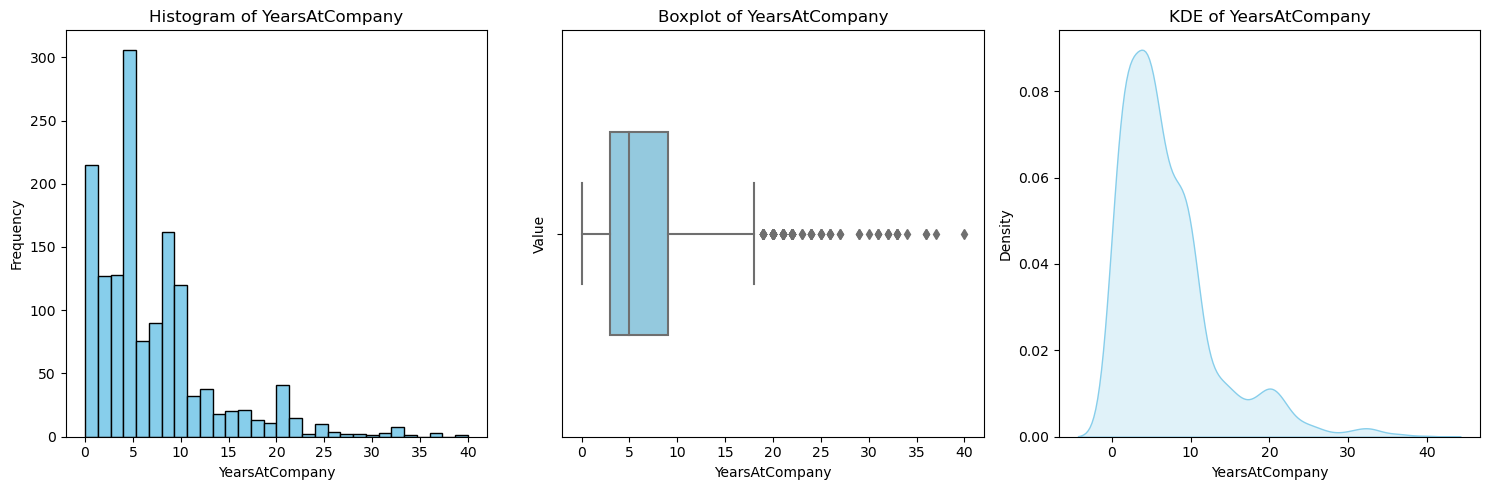

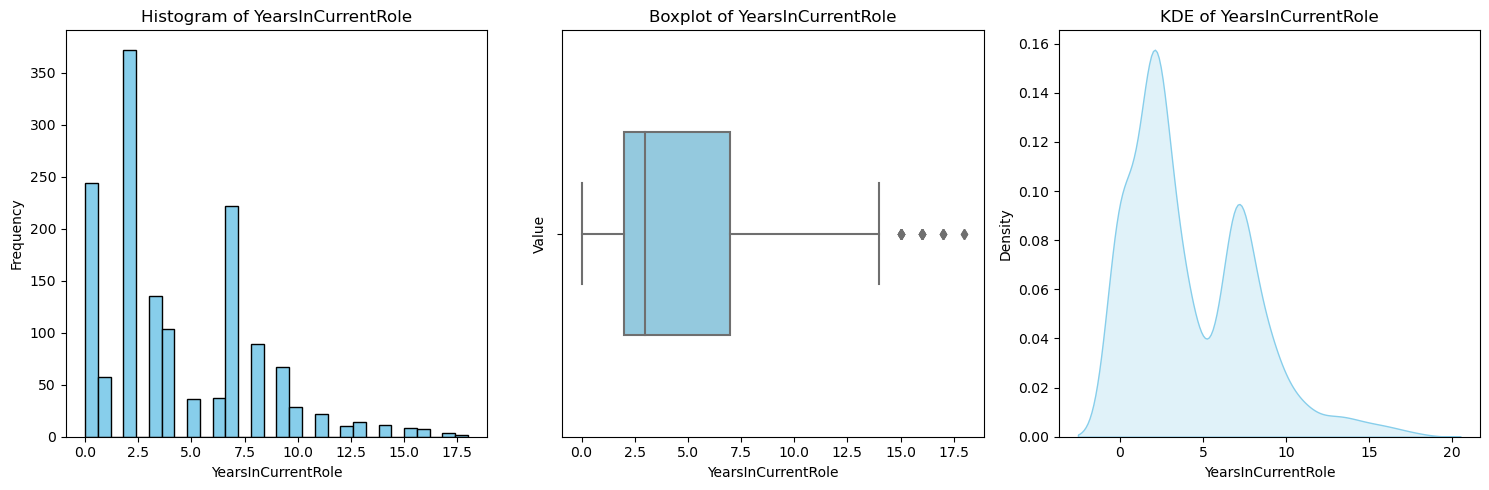

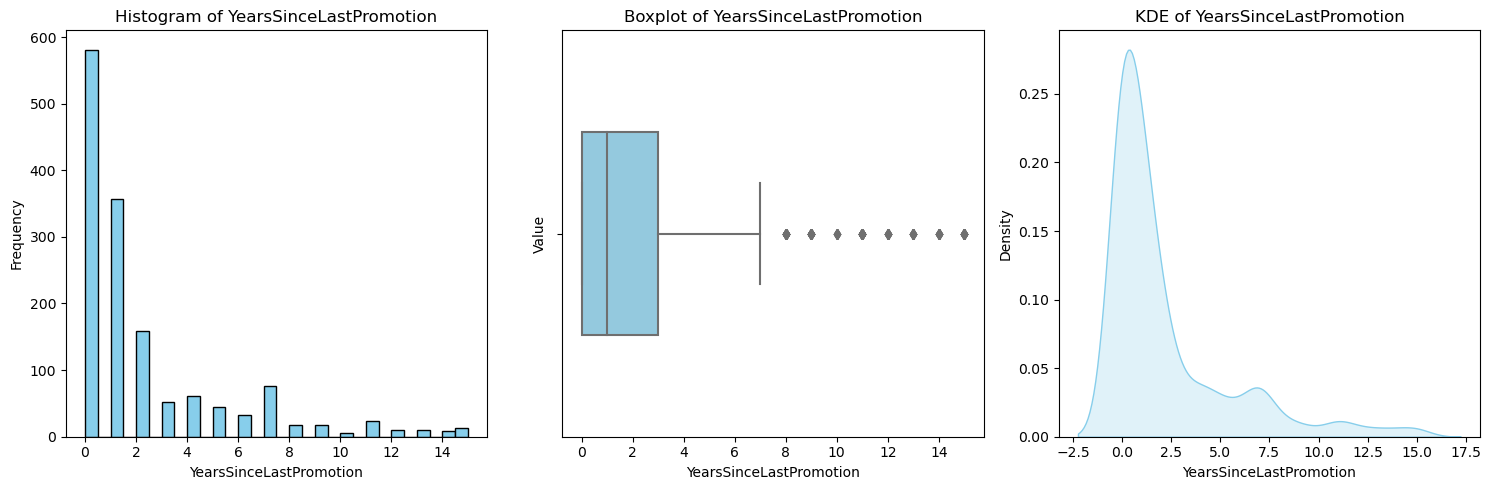

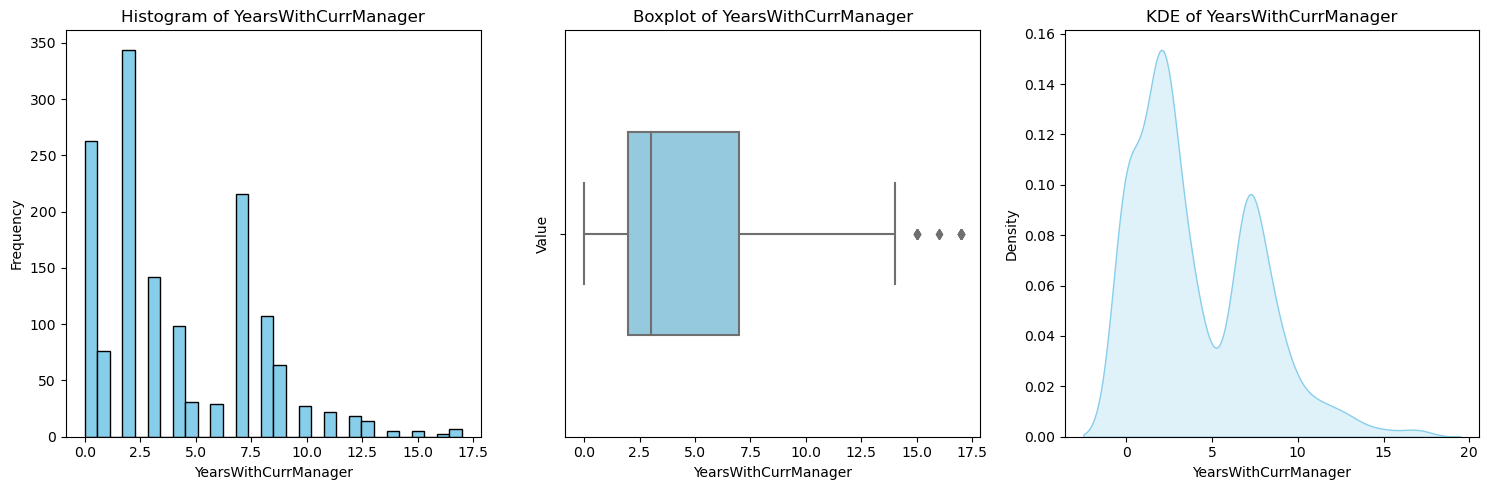

In [111]:
for col in num_df[1 : ]:
    plt.figure(figsize = [15, 5])

    # Histogram
    plt.subplot(1, 3, 1)
    attr_df[col].plot.hist(bins = 30, color = 'skyblue', edgecolor = 'black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x = attr_df[col],color = 'skyblue', width = 0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(attr_df[col], color = 'skyblue', fill = True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()

    Lets have work on some important columns.

In [114]:
fig = px.histogram(
    attr_df, 
    x = 'Age',
    color = 'Attrition',
    barmode = 'group',
    nbins = 20,
    title = 'Attrition by Age'
)
fig.update_layout(
    xaxis_title = 'Age',
    yaxis_title = 'Count'
)
fig.show()

In [115]:
fig = px.sunburst(
    attr_df,
    path = ['Gender', 'Attrition'], 
    title = 'Gender Distribution'
)
fig.update_traces(textinfo = 'label + percent parent')
fig.update_layout(title_x = 0.5)
fig.show()

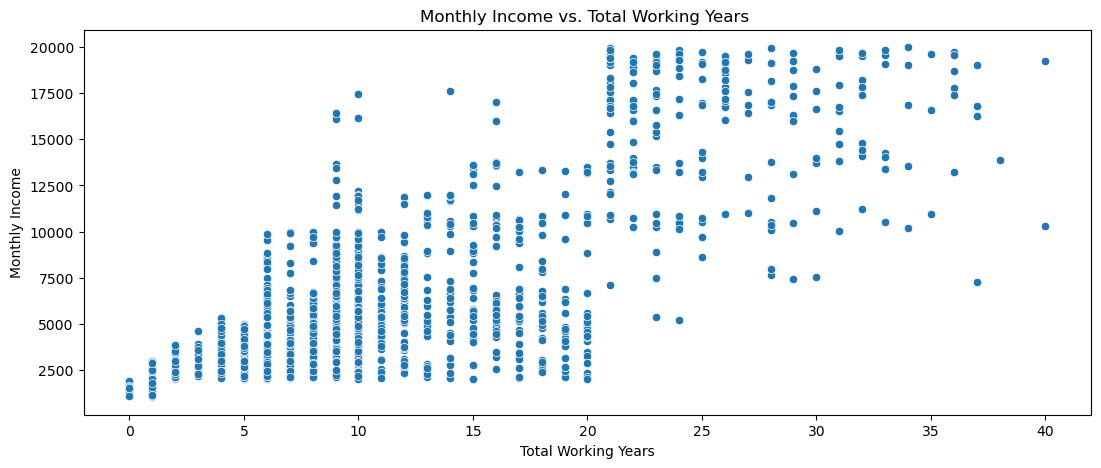

In [117]:
plt.figure(figsize=(13, 5))

sns.scatterplot(
    x = attr_df['TotalWorkingYears'], y = attr_df['MonthlyIncome']
)
plt.title('Monthly Income vs. Total Working Years ')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

    Here we can see that the Columns are relevant or correlated to each other 
        'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

In [119]:
attr_df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].corr()

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
TotalWorkingYears,1.00,0.63,0.46,0.40,0.46
YearsAtCompany,0.63,1.00,0.76,0.62,0.77
YearsInCurrentRole,0.46,0.76,1.00,0.55,0.71
YearsSinceLastPromotion,0.40,0.62,0.55,1.00,0.51
YearsWithCurrManager,0.46,0.77,0.71,0.51,1.00


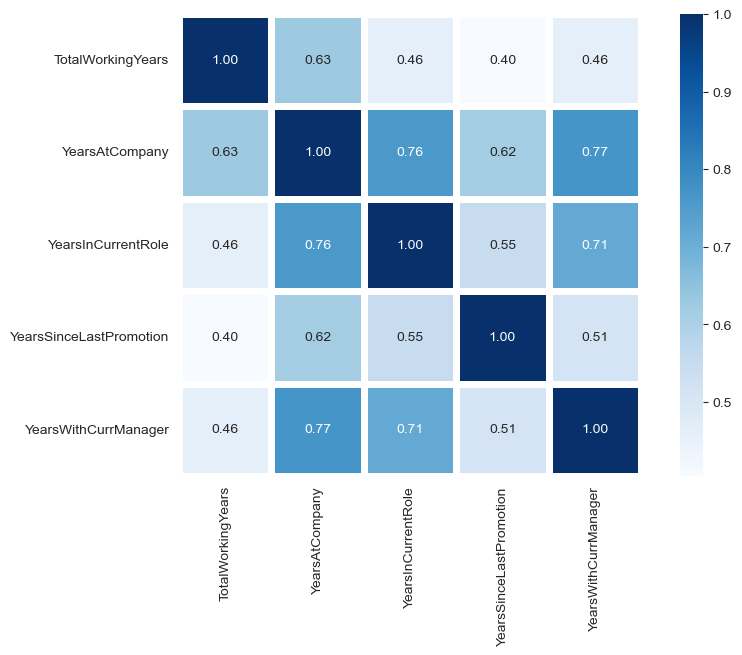

In [132]:
correlation_matrix = attr_df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].corr()
plt.figure(figsize = [10, 6])
sns.set_style("whitegrid")

ax = sns.heatmap(
    correlation_matrix, 
    annot = True, 
    cmap = 'Blues', 
    fmt = '.2f', 
    square = True, 
    cbar = True, 
    linewidths = 5
)
ax.set_facecolor('lightgrey')
plt.show()

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier

##### Some feature Engineering for this.

In [137]:
attr_df['WorkExperience'] = attr_df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                                'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis=1)

In [146]:
label_encoder = LabelEncoder()

for column in attr_df.columns:
    if attr_df[column].dtype == object:
        attr_df[column] = label_encoder.fit_transform(attr_df[column])

In [148]:
attr_df['OverallSatisfaction'] = (
    attr_df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
)

In [149]:
dropper = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobSatisfaction' , 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

In [150]:
attr_df.drop(dropper ,axis = 1, inplace = True)

In [151]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1470 non-null   int64  
 1   Attrition              1470 non-null   int32  
 2   BusinessTravel         1470 non-null   int32  
 3   DailyRate              1470 non-null   int64  
 4   Department             1470 non-null   int32  
 5   DistanceFromHome       1470 non-null   int64  
 6   Education              1470 non-null   int32  
 7   EducationField         1470 non-null   int32  
 8   EmployeeCount          1470 non-null   int64  
 9   EmployeeNumber         1470 non-null   int64  
 10  Gender                 1470 non-null   int32  
 11  HourlyRate             1470 non-null   int64  
 12  JobInvolvement         1470 non-null   int32  
 13  JobLevel               1470 non-null   int64  
 14  JobRole                1470 non-null   int32  
 15  Mari

##### Logistic Regression Test

In [175]:
train_x = attr_df.drop(columns = ['Attrition'])
train_y = attr_df['Attrition']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [177]:
model = LogisticRegression()
model = model.fit(x_train, y_train)
model

LogisticRegression()

In [178]:
y_train_pred = model.predict(x_train)

In [180]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.8324829931972789
Value of confusion_matrix :  [[977   1]
 [196   2]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.83      1.00      0.91       978
           1       0.67      0.01      0.02       198

    accuracy                           0.83      1176
   macro avg       0.75      0.50      0.46      1176
weighted avg       0.80      0.83      0.76      1176



In [181]:
y_test_pred = model.predict(x_test)

In [182]:
print("Value of accuracy_score : ", accuracy_score(y_test, y_test_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_test, y_test_pred))
print("Value of classification_report : ", classification_report(y_test, y_test_pred))

Value of accuracy_score :  0.8673469387755102
Value of confusion_matrix :  [[255   0]
 [ 39   0]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



##### Decision Tree Classifier

In [157]:
dt_rgs = DecisionTreeClassifier()

hyp_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth' : np.arange(3, 15),
    'min_samples_split' : np.arange(2, 20),
    'min_samples_leaf' : np.arange(1, 20)
}

model_2 = RandomizedSearchCV(dt_rgs, hyp_grid, cv = 5)

In [183]:
model_2.fit(x_train, y_train)
model_2.best_estimator_

DecisionTreeClassifier(max_depth=13, min_samples_leaf=19, min_samples_split=13)

In [184]:
decision = DecisionTreeClassifier(max_depth=13, min_samples_leaf=19, min_samples_split=13)
decision.fit(x_train, y_train)
decision

DecisionTreeClassifier(max_depth=13, min_samples_leaf=19, min_samples_split=13)

In [185]:
y_train_pred = decision.predict(x_train)

In [186]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.875
Value of confusion_matrix :  [[925  53]
 [ 94 104]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.91      0.95      0.93       978
           1       0.66      0.53      0.59       198

    accuracy                           0.88      1176
   macro avg       0.79      0.74      0.76      1176
weighted avg       0.87      0.88      0.87      1176



In [187]:
y_test_pred = model.predict(x_test)

In [189]:
print("Value of accuracy_score : ", accuracy_score(y_test, y_test_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_test, y_test_pred))
print("Value of classification_report : ", classification_report(y_test, y_test_pred))

Value of accuracy_score :  0.8673469387755102
Value of confusion_matrix :  [[255   0]
 [ 39   0]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



    So we found that attrition include job satisfaction, relationship satisfaction, work-life balance, 
    business travel patterns, and departmental distribution.

# Thanks - By Vikas Kumar Ram